In [62]:
import numpy as np
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
from sklearnex import patch_sklearn
patch_sklearn()
plt.rcParams['figure.dpi'] = 400

plt.style.use('science')

def plot_feature_importance_comparison(models, X_test, y_test, colors=None,):
    # Dictionary to store feature importance results
    fi_results = {}

    for model_name, model in models.items():
        fi = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
        fi_results[model_name] = fi.importances_mean

    # Extract feature names
    feature_names = list(X_test.columns)

    # Create a DataFrame for feature importance results
    importance_df = pd.DataFrame(fi_results, index=feature_names)
    with plt.style.context('science'):
        # Plot grouped bar chart
        fig, ax = plt.subplots(figsize=(6, 3))

        bar_width = 0.1
        bar_positions = np.arange(len(feature_names))

        for i, (model, importance) in enumerate(importance_df.items()):
            color = colors[i] if colors is not None else None
            ax.bar(bar_positions + (i * bar_width), importance, width=bar_width, label=model, color=color)

        # Add labels, title, and legend
        ax.set_xticks(bar_positions + 2.5 * bar_width)
        ax.set_xticklabels(feature_names, rotation=0, ha='right')
        ax.set_ylabel('Importance')
        # Shrink current axis's height by 10% on the bottom
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.1,
                        box.width, box.height * 0.9])

        # Put a legend below current axis
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
                fancybox=True, shadow=True, ncol=3,fontsize = 'x-small')
        plt.show()
def plot_feature_mean_squared_error(models, X, y, colors=None,cv = 5,random_state = 123):
    # Dictionary to store feature importance results
    
    kf = KFold(n_splits=cv, shuffle=True, random_state=random_state)

    # Define a function to calculate RMSE
    def rmse(y_true, y_pred):
        return np.sqrt(mean_squared_error(y_true, y_pred))

    # Create a scorer using the RMSE function
    rmse_scorer = make_scorer(rmse, greater_is_better=False)

    mean_rmse = {}
    model_names = []
    for model_name,model in models.items():
        cross_val_scores = cross_val_score(model, X, y, cv=kf, scoring=rmse_scorer)
        mean_rmse[model_name] = -np.mean(cross_val_scores)
        model_names.append(model_name)
    with plt.style.context('science'):
        # Plot grouped bar chart
        fig, ax = plt.subplots(figsize=(6, 2))
        bar_width = 0.1
        plt.barh(model_names, mean_rmse.values(),color = colors)
        plt.xlabel('Root Mean Squared Error')
        plt.show()
def plot_feature_classification_error(models, X, y, colors=None, cv=5, random_state=123):
    # Dictionary to store feature importance results
    kf = KFold(n_splits=cv, shuffle=True, random_state=random_state)
    mean_error = {}
    model_names = []
    
    for model_name, model in models.items():
        cross_val_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
        mean_error[model_name] = np.mean(cross_val_scores)  # Classification error
        model_names.append(model_name)
        
    with plt.style.context('science'):
        # Plot grouped bar chart
        fig, ax = plt.subplots(figsize=(6, 2))
        bar_width = 0.1
        plt.barh(model_names, mean_error.values(), color=colors)
        plt.xlabel('5-fold cv accuracy')
        plt.show()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Simulation Studies

## Linear Relation

1.Simulation studies 
for checking PDP and PFI methods pros and cons
nopise mean is zero and variance is 0.1

$ {y^i = \beta_1 x_1^i + \beta_1 x_2^i + \beta_1 x_3^i+ \beta_1 x_4^i + \epsilon}$

Covariance matrix :
${\begin{bmatrix}
1 & 0 & 0& 0\\
0 & 1 & 0& 0\\
0 & 0 & 1& 0\\
0 & 0 & 0& 1\\
\end{bmatrix}}$

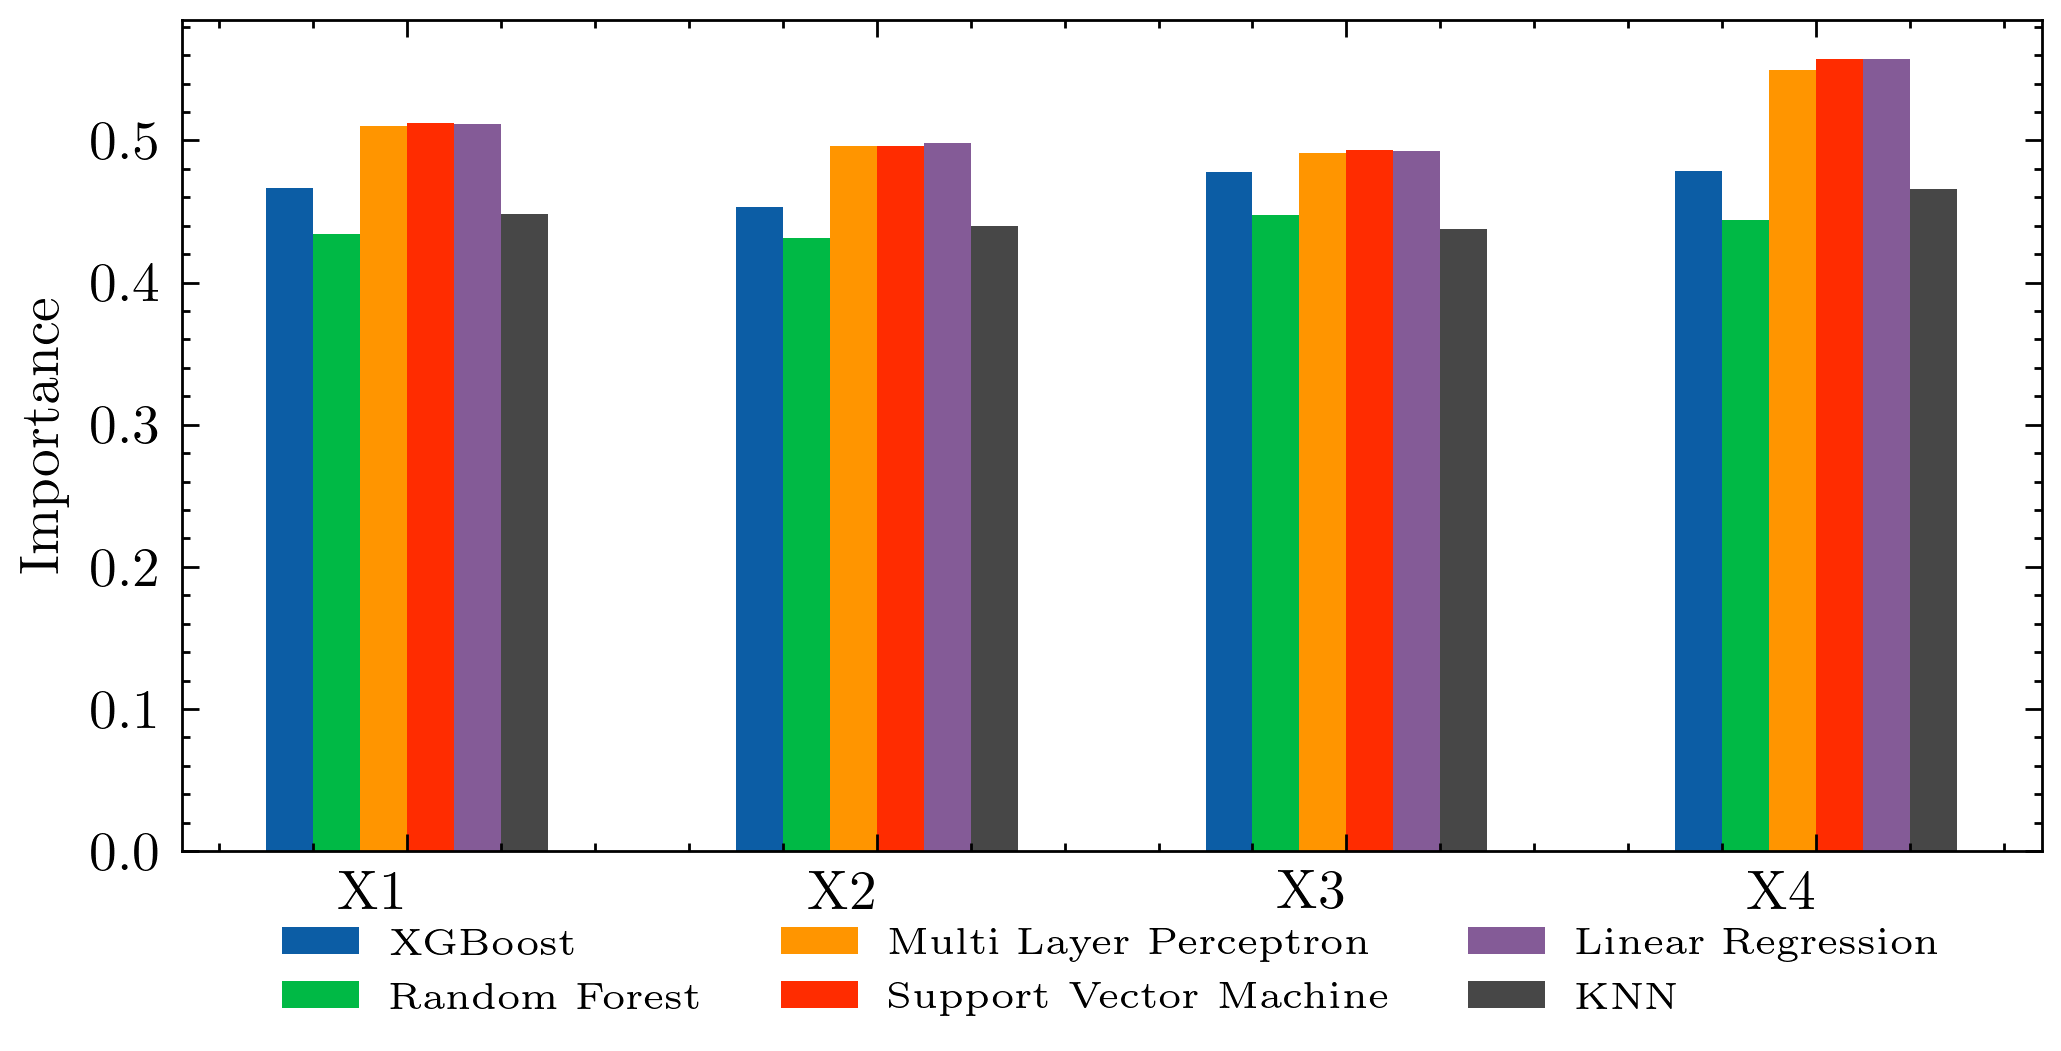

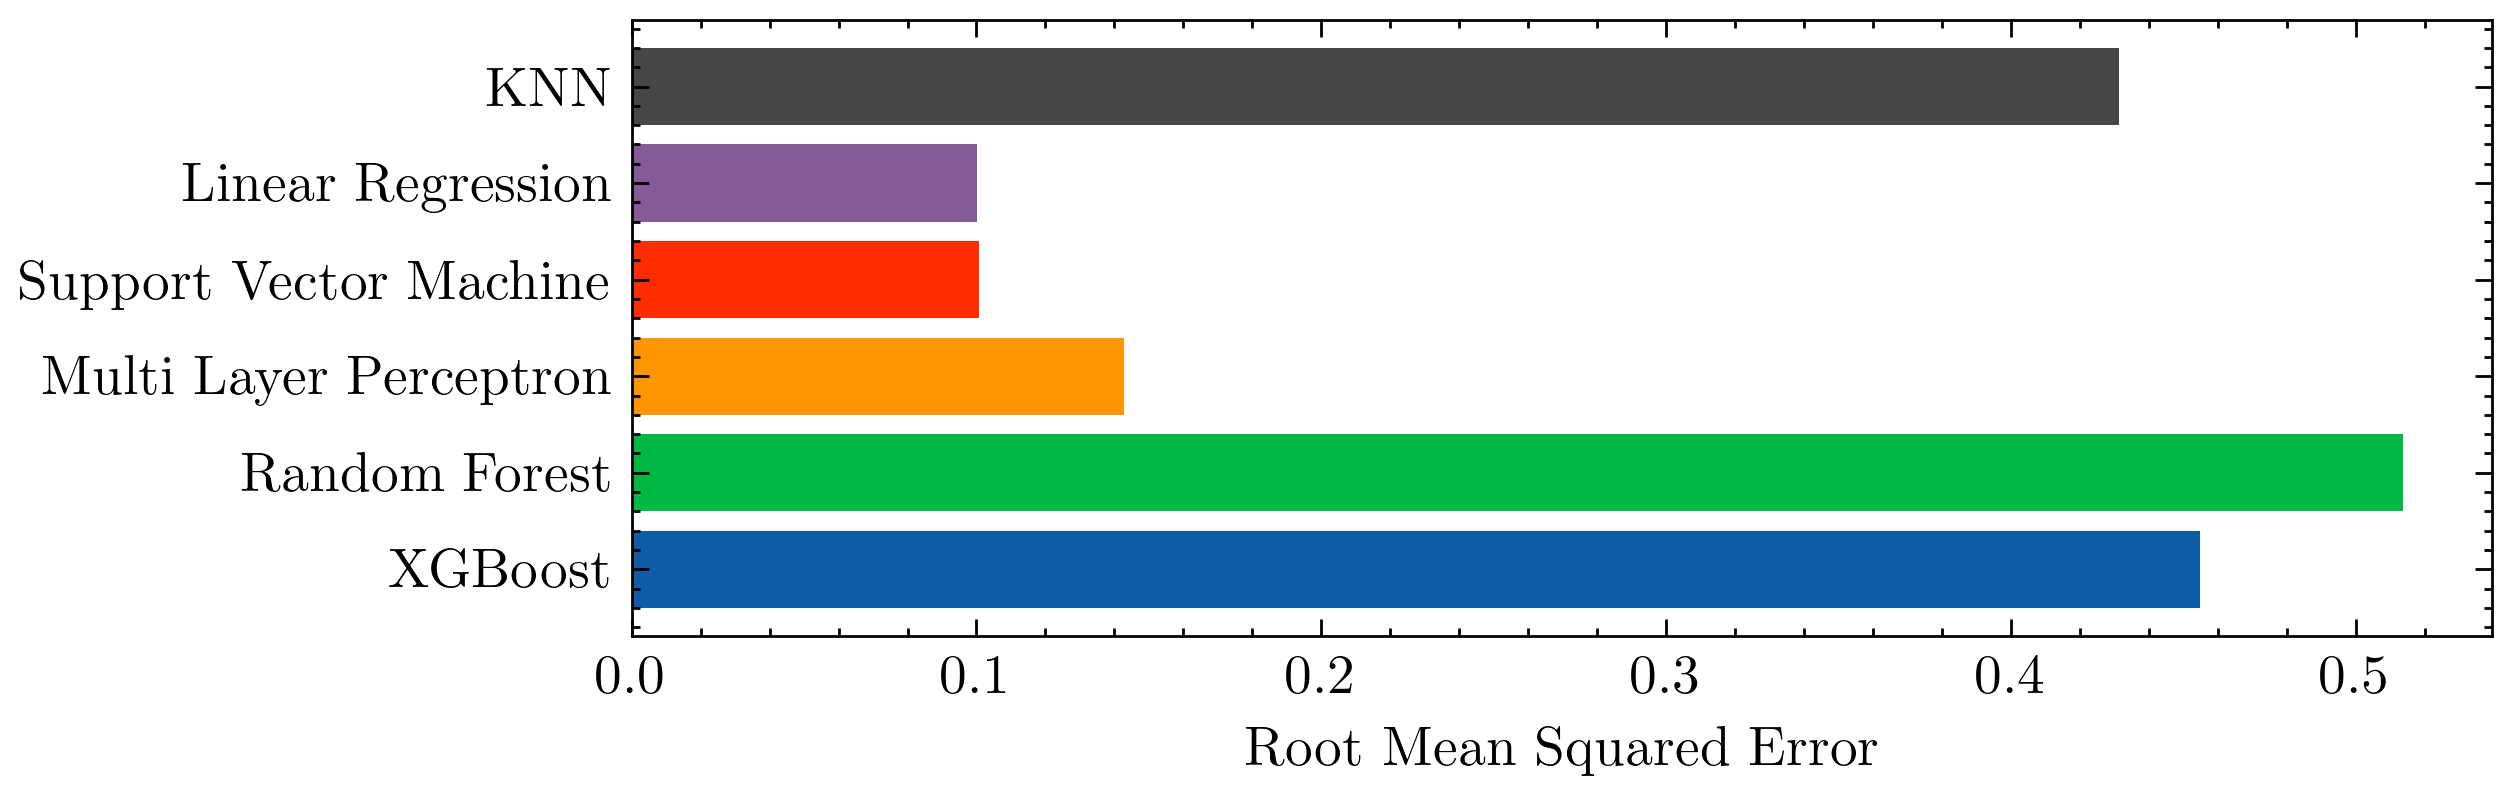

In [63]:
np.random.seed(123)

num_samples = 1500

# Generating each feature separately
X1 = np.random.randn(num_samples)  # Feature 1
X2 = np.random.randn(num_samples)  # Feature 2
X3 = np.random.randn(num_samples)  # Feature 3
X4 = np.random.randn(num_samples)  # Feature 4

# Target variable (y) as the sum of features plus noise
noise = np.random.normal(0, 0.1, num_samples)  # Adding noise
y = X1  + X2 +  X3 + X4 + noise

# Creating a DataFrame
data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4,'y': y})

# Features and Target
X = data[['X1', 'X2', 'X3', 'X4']]
y = data['y']

# Splitting the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting different regression models
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Support Vector Machine Regression
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train)

# XGBoost Regression
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
# Multi-layer Perceptron Regression
mlp_reg = MLPRegressor(hidden_layer_sizes=(100), max_iter=1000, random_state=42)
mlp_reg.fit(X_train, y_train)

# Example usage with custom colors
models = {
    'XGBoost': xgb_reg,
    'Random Forest': rf_reg,
    'Multi Layer Perceptron': mlp_reg,
    'Support Vector Machine': svm_reg,
    "Linear Regression":linear_reg,
    "KNN":knn_reg,
}

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
num_colors = 10
custom_colors = color_cycle[:num_colors]

plot_feature_importance_comparison(models, X_test, y_test, colors=custom_colors)
plot_feature_mean_squared_error(models,X_train,y_train,custom_colors)

In [75]:
%%capture
from sklearn.inspection import PartialDependenceDisplay
my_plot = None
with plt.style.context('science'):
    fig,(ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(10, 2.5))  # (rows, columns, index)
    lr_disp = PartialDependenceDisplay.from_estimator(linear_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    knn_disp = PartialDependenceDisplay.from_estimator(knn_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    xgb_disp = PartialDependenceDisplay.from_estimator(xgb_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    rf_disp = PartialDependenceDisplay.from_estimator(rf_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    mlrp_disp = PartialDependenceDisplay.from_estimator(mlp_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    svm_disp = PartialDependenceDisplay.from_estimator(svm_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    x_vals = np.linspace(-2, 2, 1000)
    ax1.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    ax2.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    ax3.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    ax4.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    lr_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "LR","color":custom_colors[4]})
    knn_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "KNN","color":custom_colors[5]})
    xgb_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "xgboost","color":custom_colors[0]})
    rf_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "random forest","color":custom_colors[1]})
    mlrp_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "NN","color":custom_colors[2]})
    svm_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "SVM","color":custom_colors[3]})
    for ax in [ax1, ax2, ax3, ax4]:
        ax.get_legend().remove()
        ax.set_ylim(-3, 3)
        ax.set_ylabel('')  
    for ax in [ax2, ax3, ax4]:
        ax.set_yticks([])
    def legend_without_duplicate_labels(ax):
        handles, labels = ax.get_legend_handles_labels()
        unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
        return unique
    lines_labels = legend_without_duplicate_labels(ax1)
    lines, labels = zip(*lines_labels)
    lines = list(lines)
    labels = list(labels)
    my_plot = fig

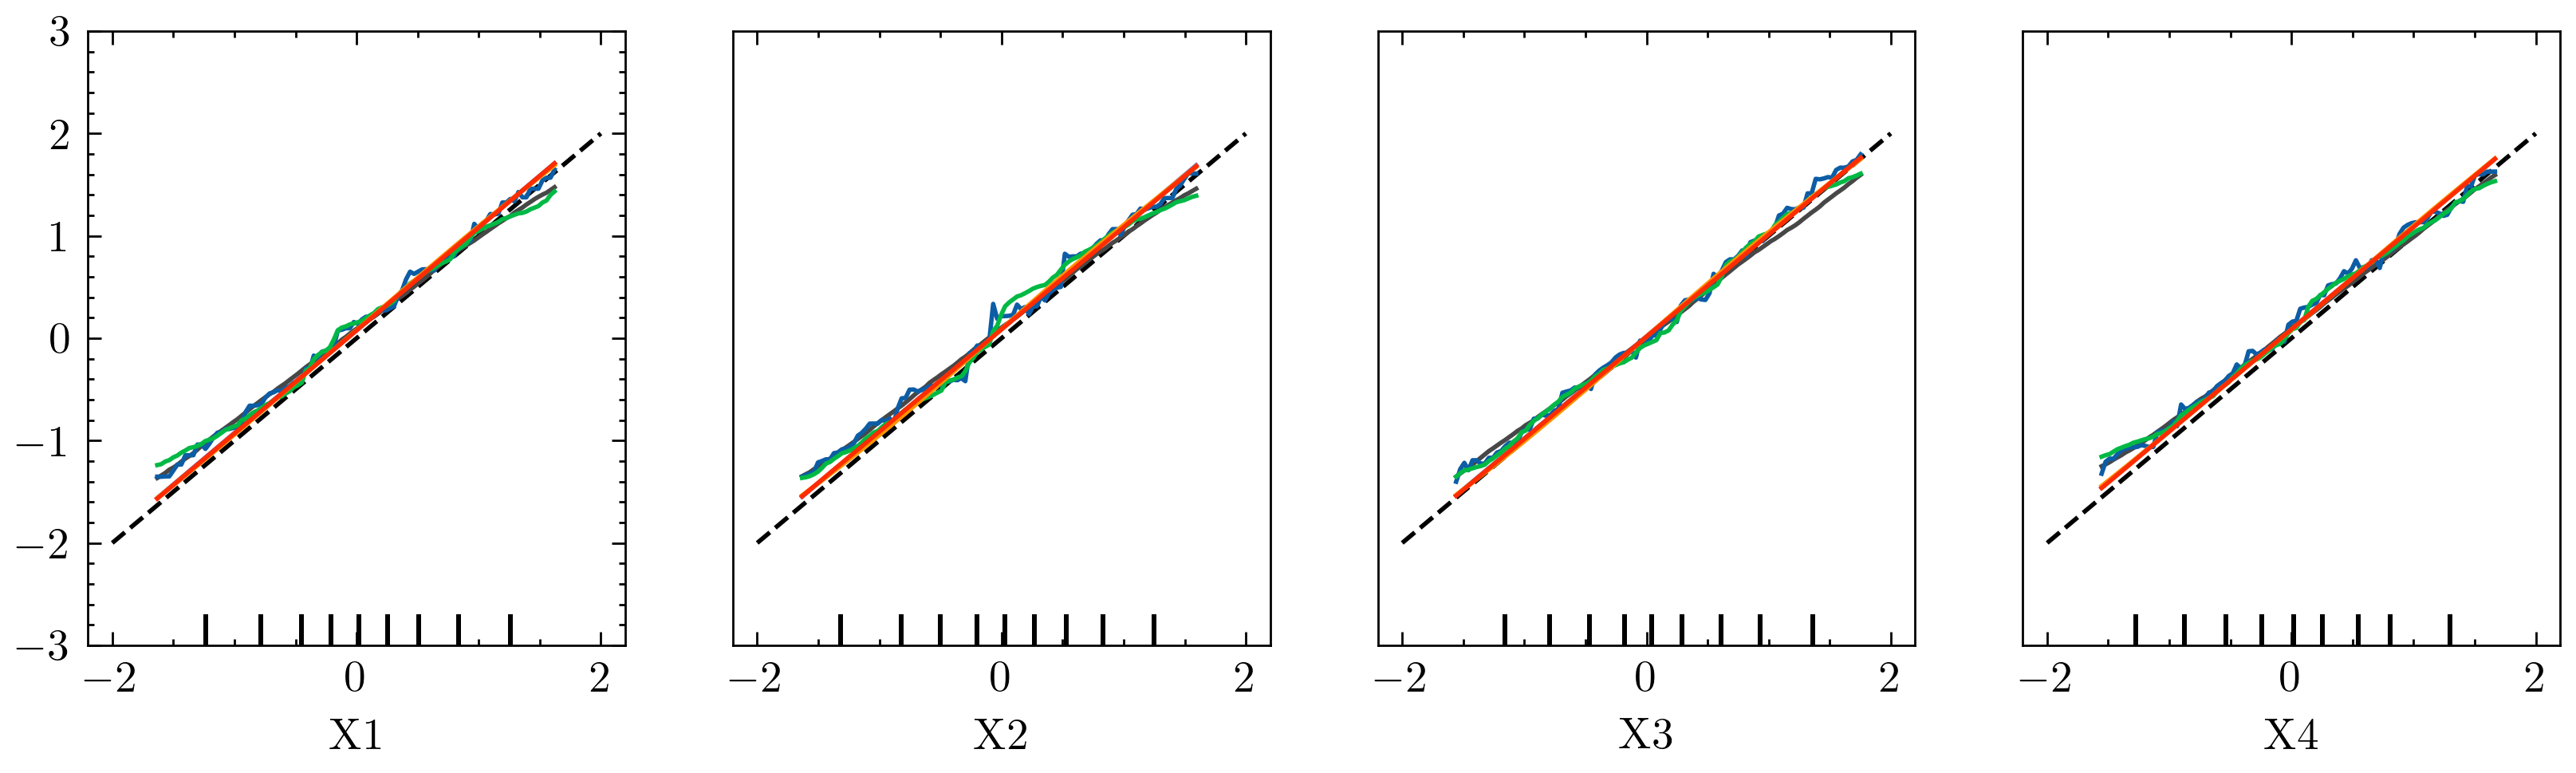

In [76]:
display(my_plot)

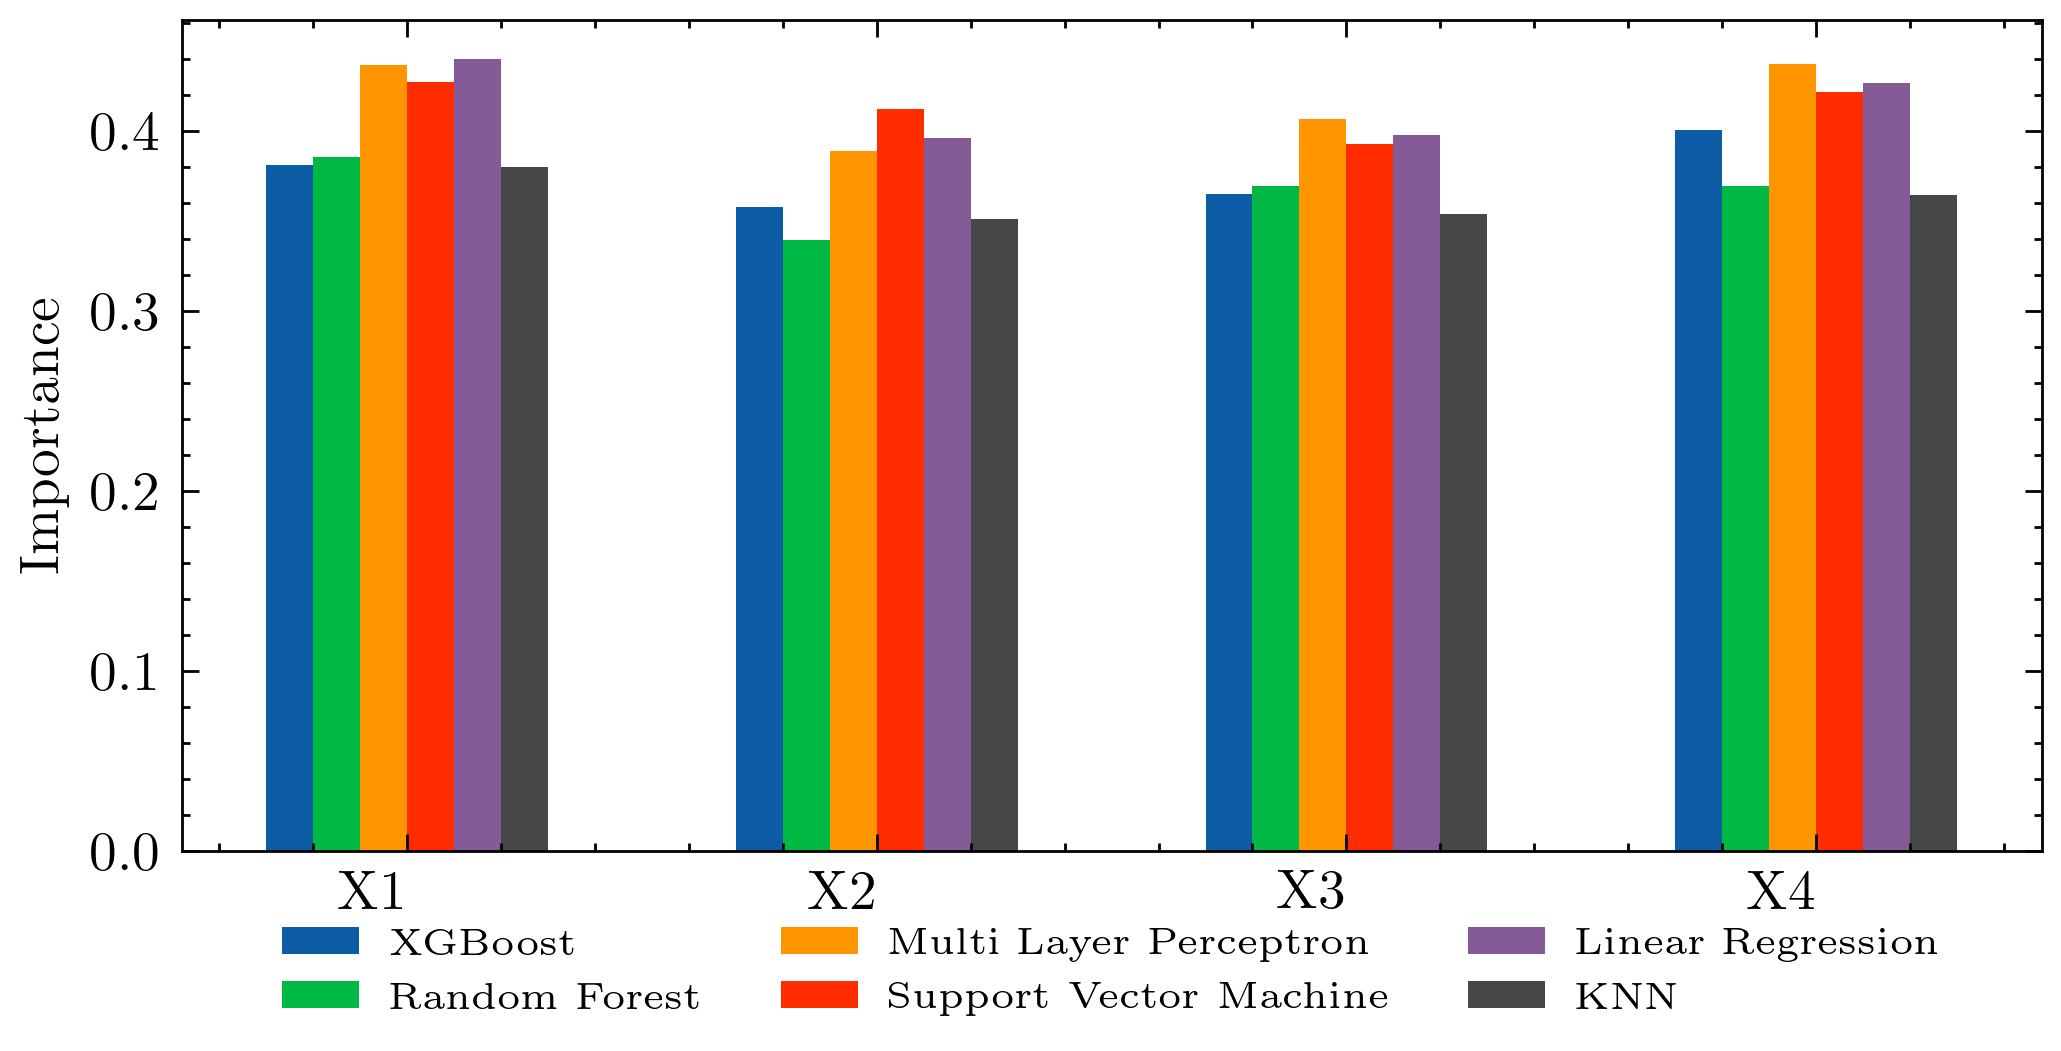

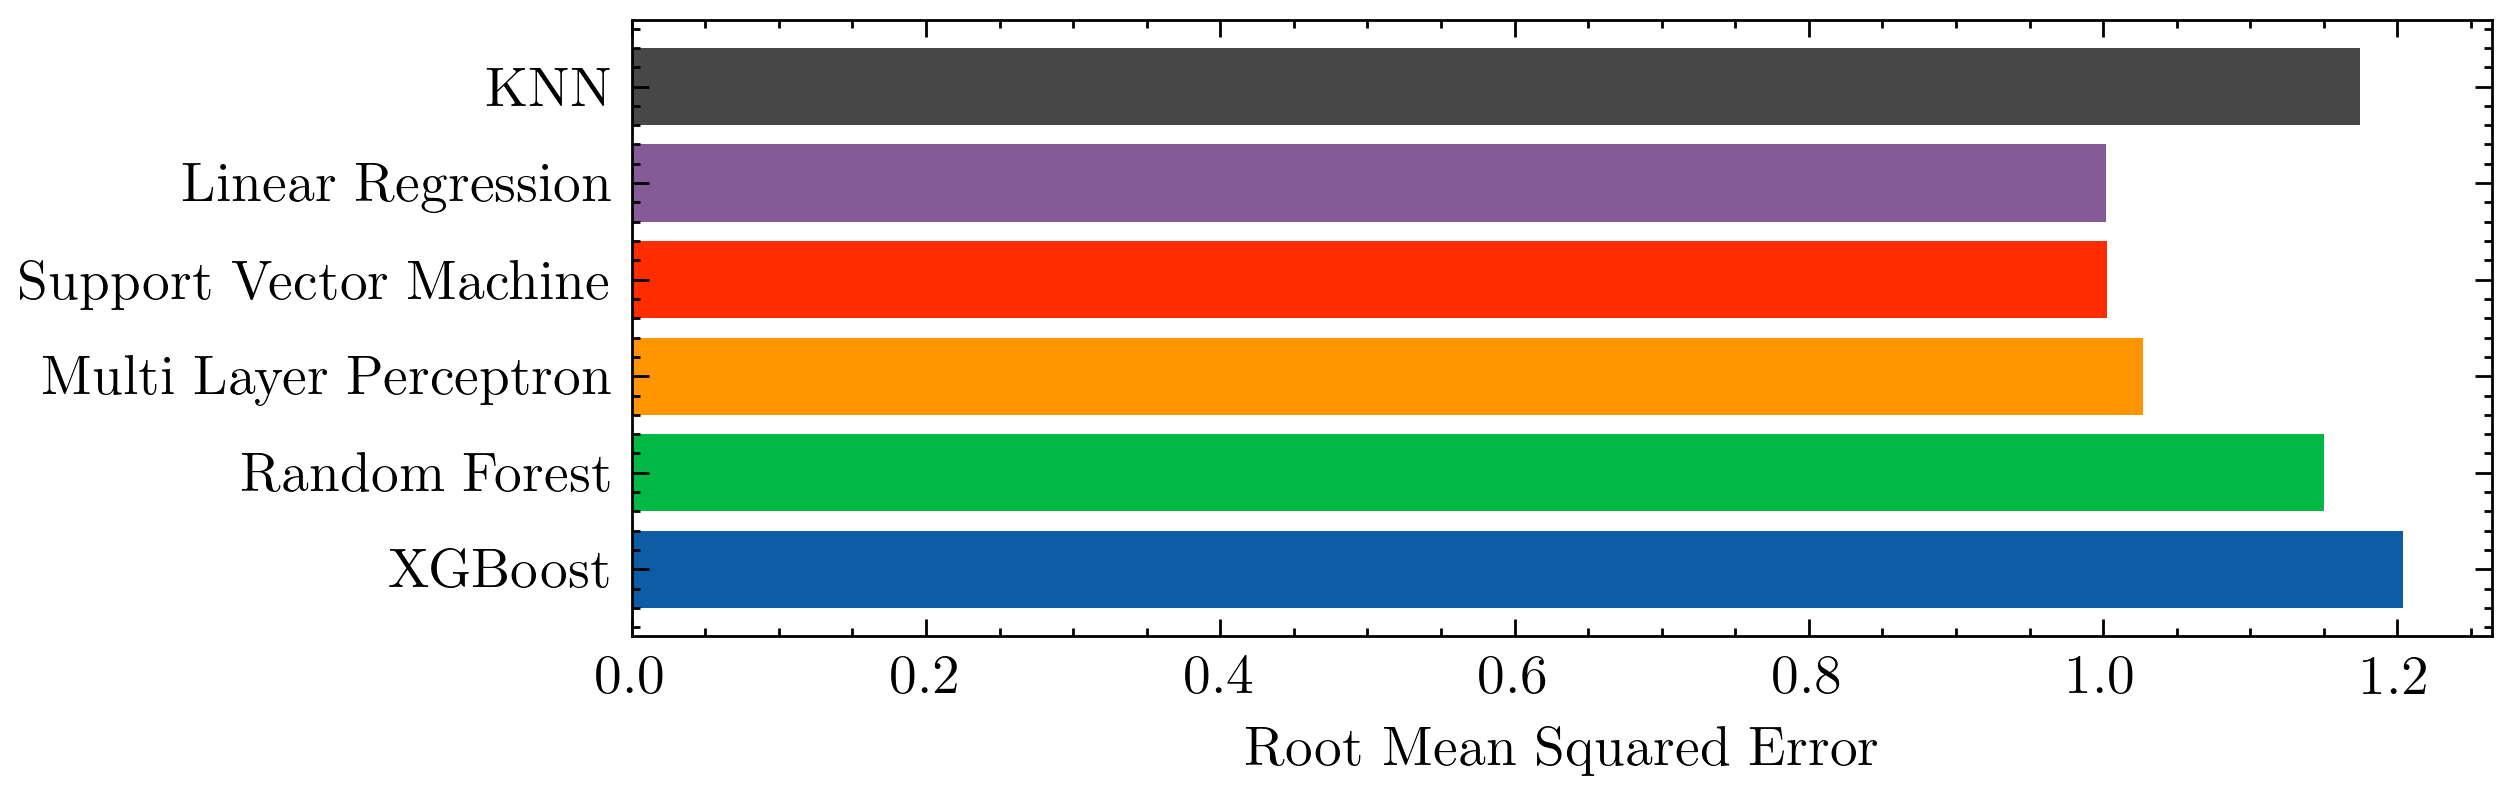

In [77]:
np.random.seed(123)

num_samples = 1500

# Generating each feature separately
X1 = np.random.randn(num_samples)  # Feature 1
X2 = np.random.randn(num_samples)  # Feature 2
X3 = np.random.randn(num_samples)  # Feature 3
X4 = np.random.randn(num_samples)  # Feature 4

# Target variable (y) as the sum of features plus noise
noise = np.random.normal(0, 1, num_samples)  # Adding noise
y = X1  + X2 +  X3 + X4 + noise

# Creating a DataFrame
data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4,'y': y})

# Features and Target
X = data[['X1', 'X2', 'X3', 'X4']]
y = data['y']

# Splitting the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting different regression models
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Support Vector Machine Regression
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train)

# XGBoost Regression
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
# Multi-layer Perceptron Regression
mlp_reg = MLPRegressor(hidden_layer_sizes=(100), max_iter=1000, random_state=42)
mlp_reg.fit(X_train, y_train)

# Example usage with custom colors
models = {
    'XGBoost': xgb_reg,
    'Random Forest': rf_reg,
    'Multi Layer Perceptron': mlp_reg,
    'Support Vector Machine': svm_reg,
    "Linear Regression":linear_reg,
    "KNN":knn_reg,
}

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
num_colors = 10
custom_colors = color_cycle[:num_colors]

plot_feature_importance_comparison(models, X_test, y_test, colors=custom_colors)
plot_feature_mean_squared_error(models,X_train,y_train,custom_colors)

In [78]:
%%capture
from sklearn.inspection import PartialDependenceDisplay
my_plot = None
with plt.style.context('science'):
    fig,(ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(10, 2.5))  # (rows, columns, index)
    lr_disp = PartialDependenceDisplay.from_estimator(linear_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    knn_disp = PartialDependenceDisplay.from_estimator(knn_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    xgb_disp = PartialDependenceDisplay.from_estimator(xgb_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    rf_disp = PartialDependenceDisplay.from_estimator(rf_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    mlrp_disp = PartialDependenceDisplay.from_estimator(mlp_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    svm_disp = PartialDependenceDisplay.from_estimator(svm_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    x_vals = np.linspace(-2, 2, 1000)
    ax1.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    ax2.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    ax3.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    ax4.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    lr_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "LR","color":custom_colors[4]})
    knn_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "KNN","color":custom_colors[5]})
    xgb_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "xgboost","color":custom_colors[0]})
    rf_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "random forest","color":custom_colors[1]})
    mlrp_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "NN","color":custom_colors[2]})
    svm_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "SVM","color":custom_colors[3]})
    for ax in [ax1, ax2, ax3, ax4]:
        ax.get_legend().remove()
        ax.set_ylim(-3, 3)
        ax.set_ylabel('')  
    for ax in [ax2, ax3, ax4]:
        ax.set_yticks([])
    def legend_without_duplicate_labels(ax):
        handles, labels = ax.get_legend_handles_labels()
        unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
        return unique
    lines_labels = legend_without_duplicate_labels(ax1)
    lines, labels = zip(*lines_labels)
    lines = list(lines)
    labels = list(labels)
    my_plot = fig

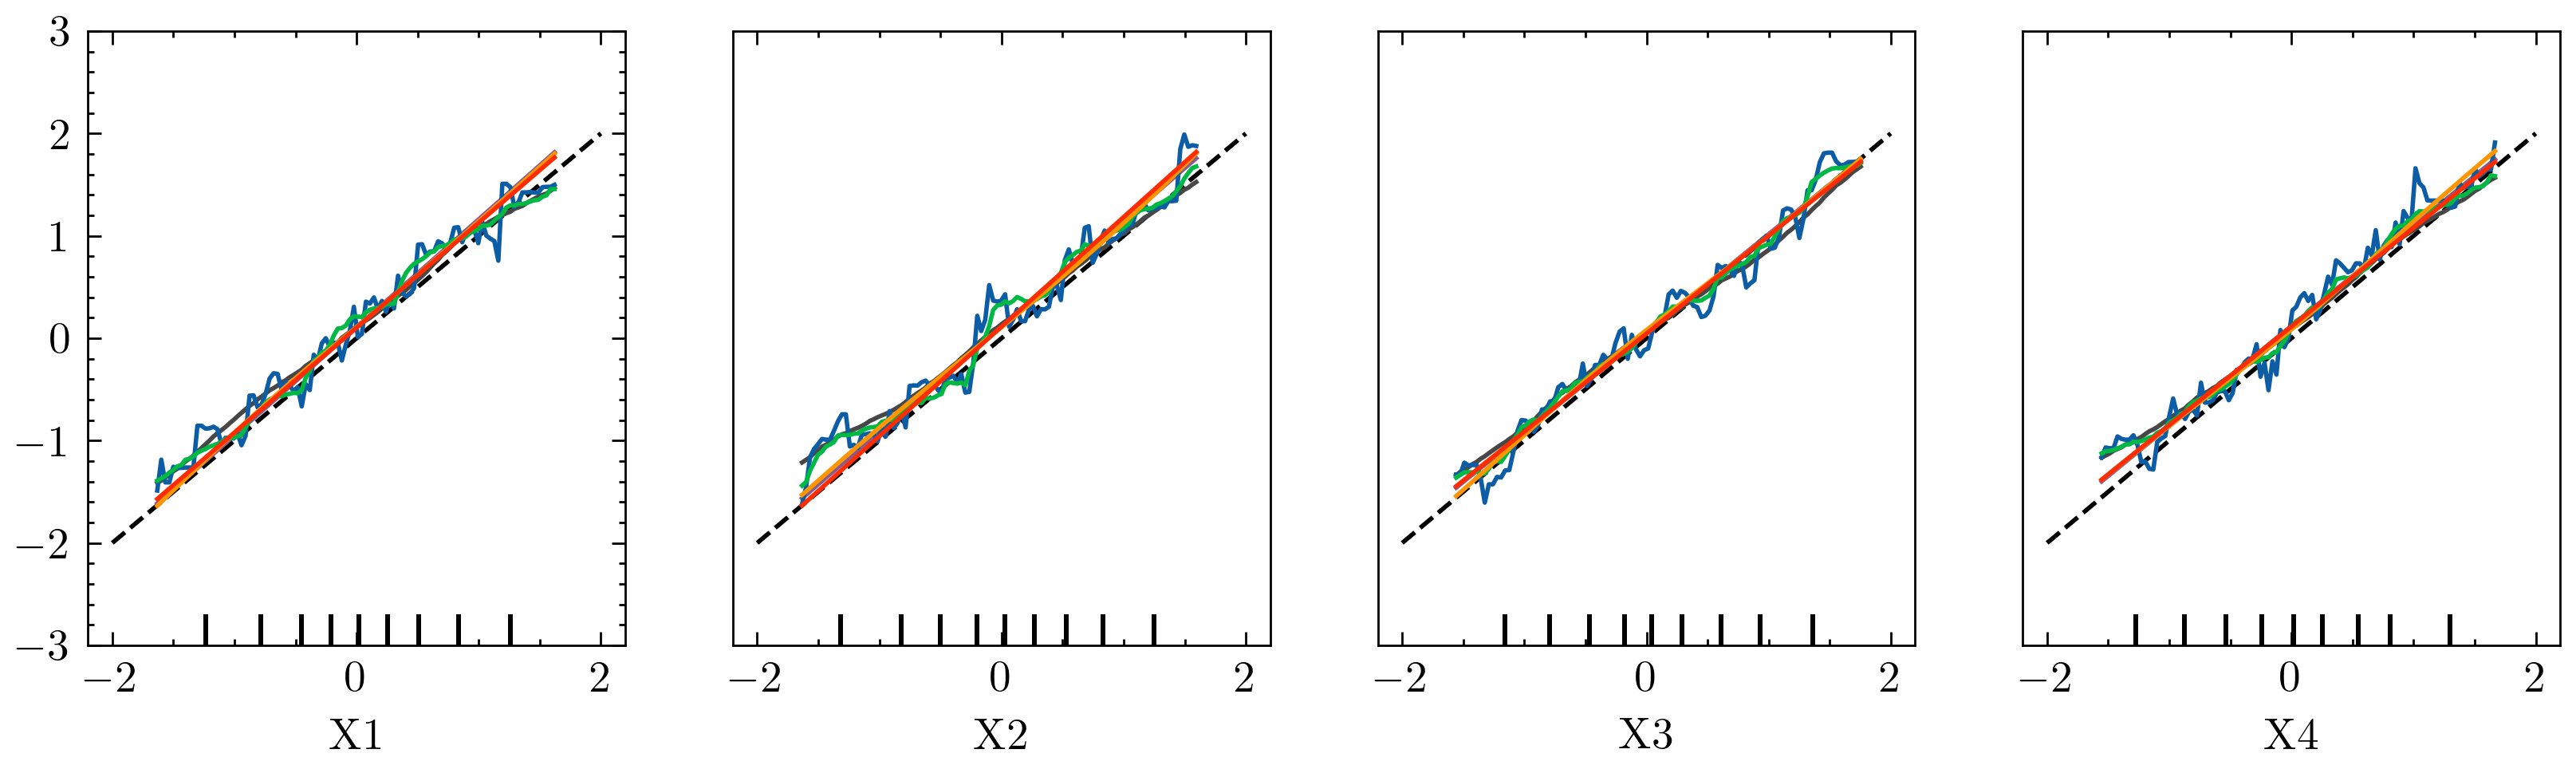

In [79]:
display(my_plot)

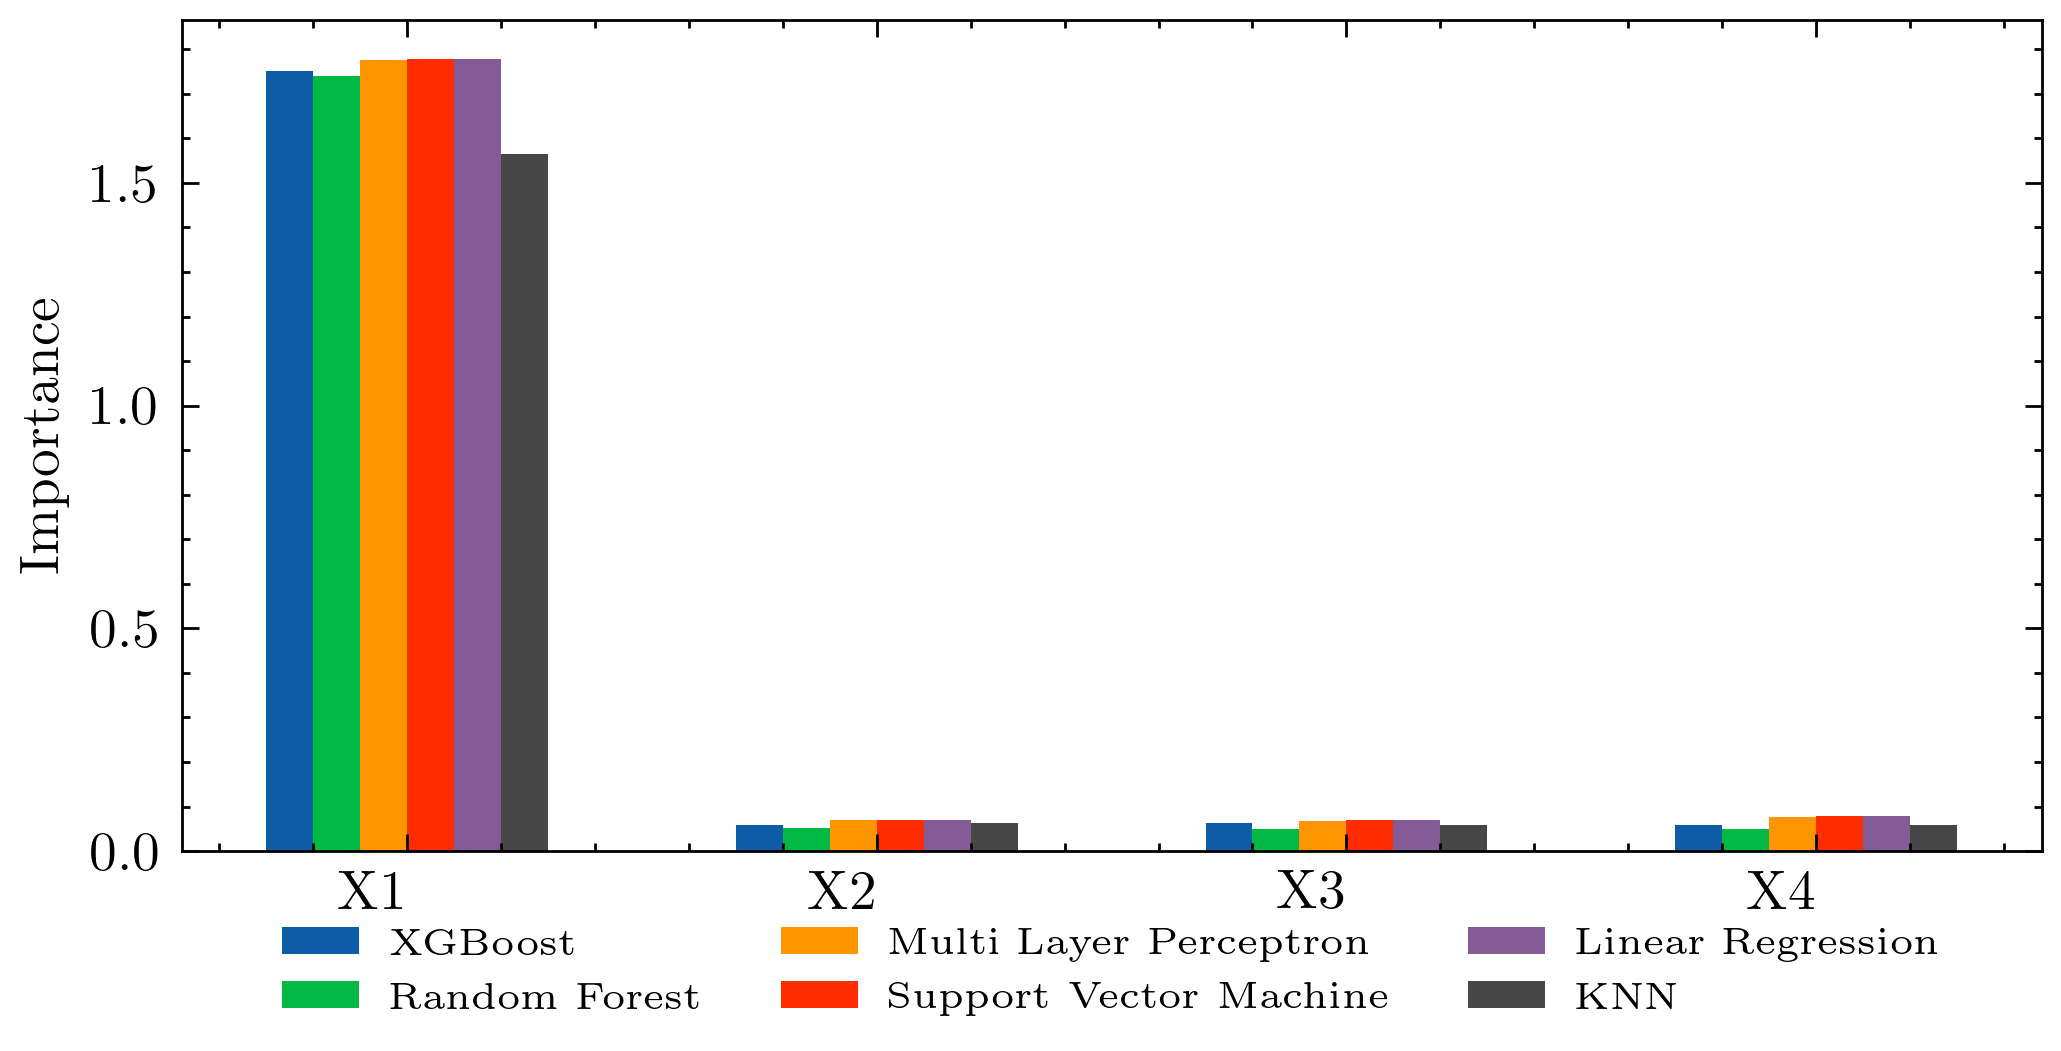

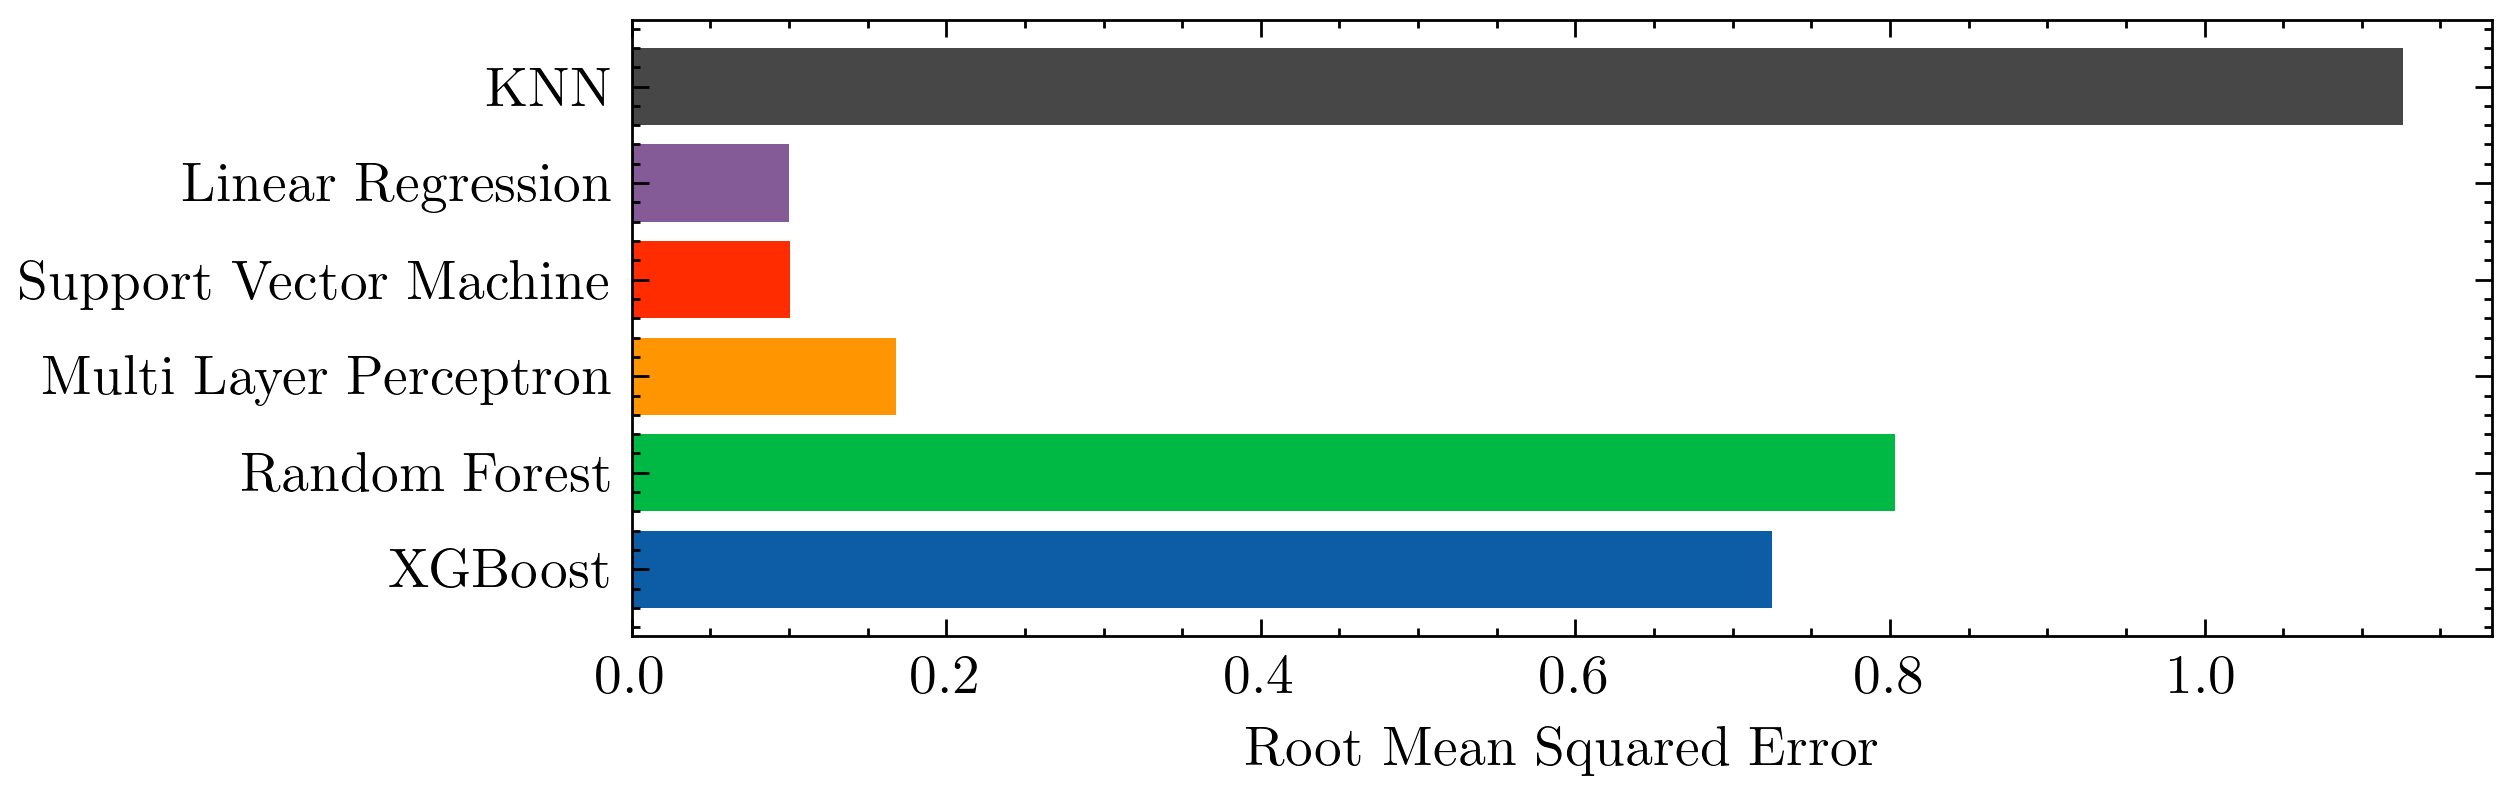

In [80]:
np.random.seed(123)

num_samples = 1500

# Generating each feature separately
X1 = np.random.randn(num_samples)  # Feature 1
X2 = np.random.randn(num_samples)  # Feature 2
X3 = np.random.randn(num_samples)  # Feature 3
X4 = np.random.randn(num_samples)  # Feature 4

# Target variable (y) as the sum of features plus noise
noise = np.random.normal(0, 0.1, num_samples)  # Adding noise
y = 5*X1  + X2 +  X3 + X4 + noise

# Creating a DataFrame
data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4,'y': y})

# Features and Target
X = data[['X1', 'X2', 'X3', 'X4']]
y = data['y']

# Splitting the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting different regression models
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Support Vector Machine Regression
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train)

# XGBoost Regression
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
# Multi-layer Perceptron Regression
mlp_reg = MLPRegressor(hidden_layer_sizes=(100), max_iter=1000, random_state=42)
mlp_reg.fit(X_train, y_train)

# Example usage with custom colors
models = {
    'XGBoost': xgb_reg,
    'Random Forest': rf_reg,
    'Multi Layer Perceptron': mlp_reg,
    'Support Vector Machine': svm_reg,
    "Linear Regression":linear_reg,
    "KNN":knn_reg,
}

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
num_colors = 10
custom_colors = color_cycle[:num_colors]

plot_feature_importance_comparison(models, X_test, y_test, colors=custom_colors)
plot_feature_mean_squared_error(models,X_train,y_train,custom_colors)

In [83]:
%%capture
from sklearn.inspection import PartialDependenceDisplay
my_plot = None
with plt.style.context('science'):
    fig,(ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(10, 2.5))  # (rows, columns, index)
    lr_disp = PartialDependenceDisplay.from_estimator(linear_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    knn_disp = PartialDependenceDisplay.from_estimator(knn_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    xgb_disp = PartialDependenceDisplay.from_estimator(xgb_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    rf_disp = PartialDependenceDisplay.from_estimator(rf_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    mlrp_disp = PartialDependenceDisplay.from_estimator(mlp_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    svm_disp = PartialDependenceDisplay.from_estimator(svm_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    x_vals = np.linspace(-2, 2, 1000)
    ax1.plot(x_vals, 5 *x_vals, label='true effect', color='black',linestyle='dashed')
    ax2.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    ax3.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    ax4.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    lr_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "LR","color":custom_colors[4]})
    knn_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "KNN","color":custom_colors[5]})
    xgb_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "xgboost","color":custom_colors[0]})
    rf_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "random forest","color":custom_colors[1]})
    mlrp_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "NN","color":custom_colors[2]})
    svm_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "SVM","color":custom_colors[3]})
    for ax in [ax1, ax2, ax3, ax4]:
        ax.get_legend().remove()
        ax.set_ylabel('')  
    for ax in [ax2, ax3, ax4]:
        ax.set_yticks([])
    def legend_without_duplicate_labels(ax):
        handles, labels = ax.get_legend_handles_labels()
        unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
        return unique
    lines_labels = legend_without_duplicate_labels(ax1)
    lines, labels = zip(*lines_labels)
    lines = list(lines)
    labels = list(labels)
    my_plot = fig

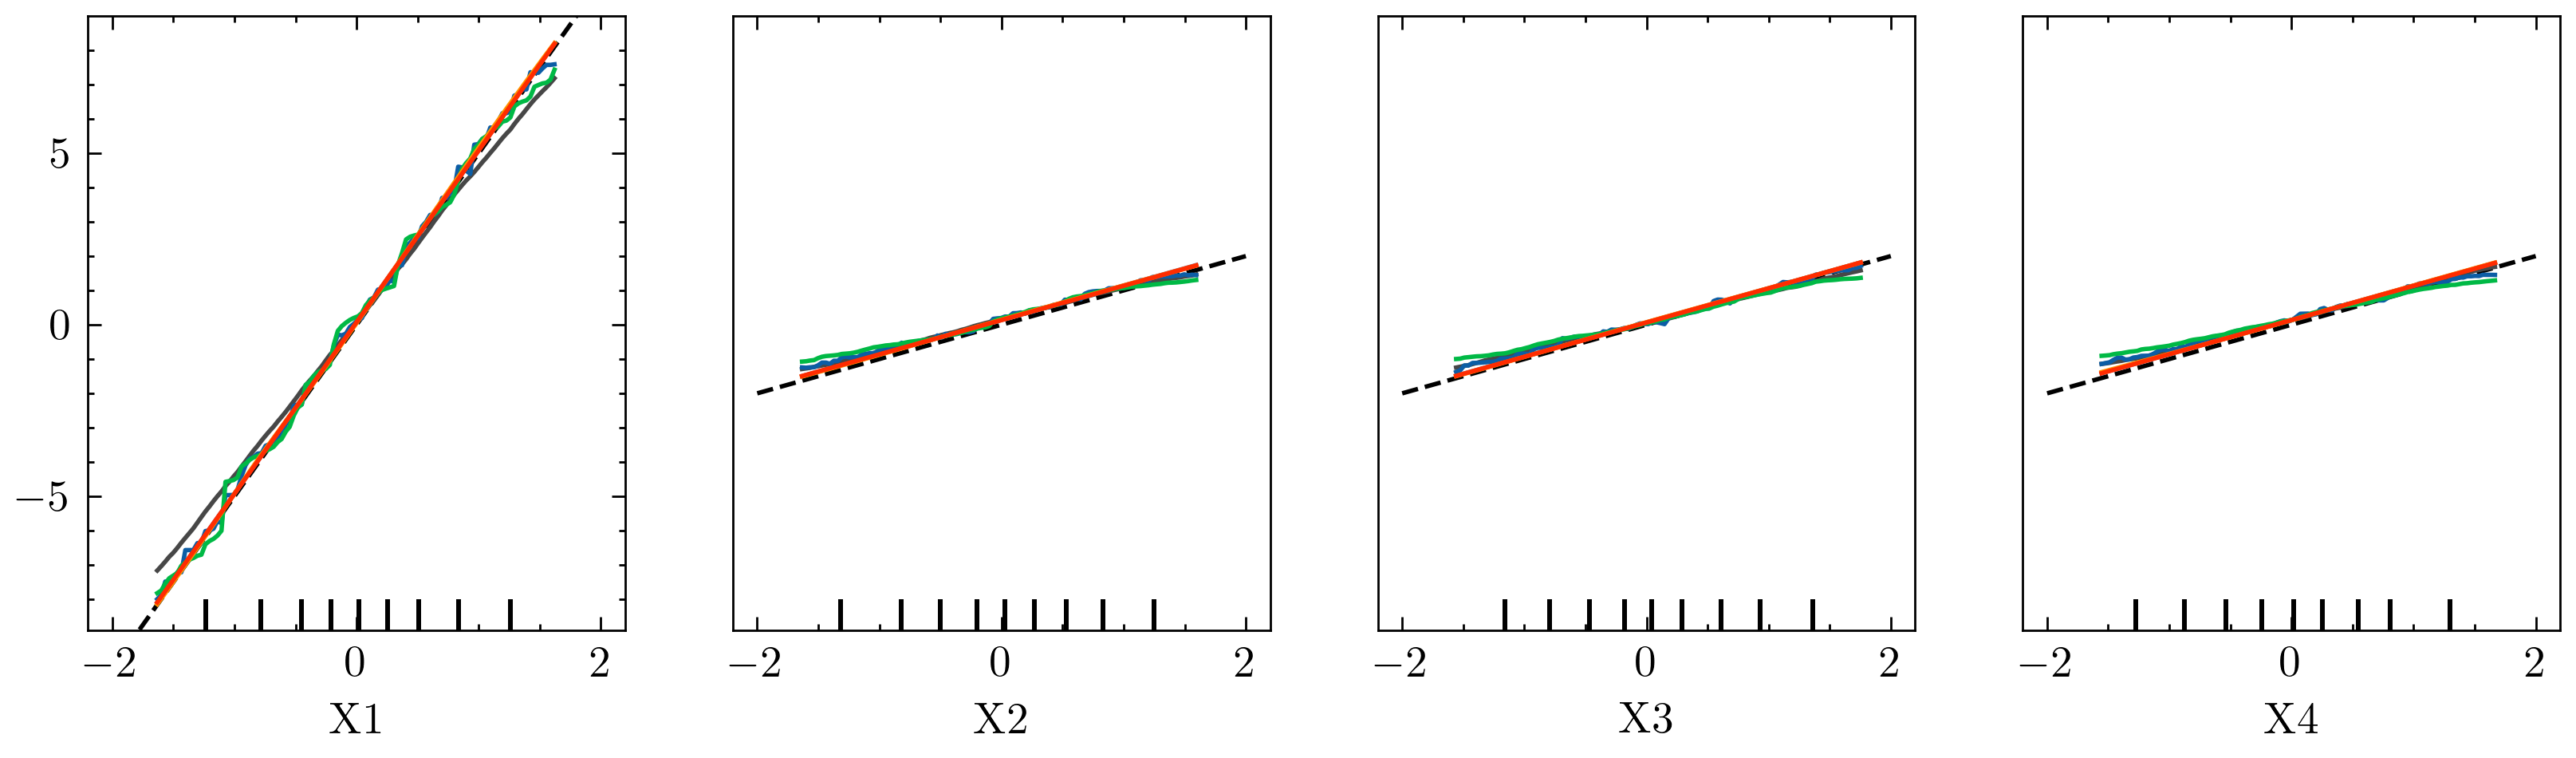

In [84]:
display(my_plot)

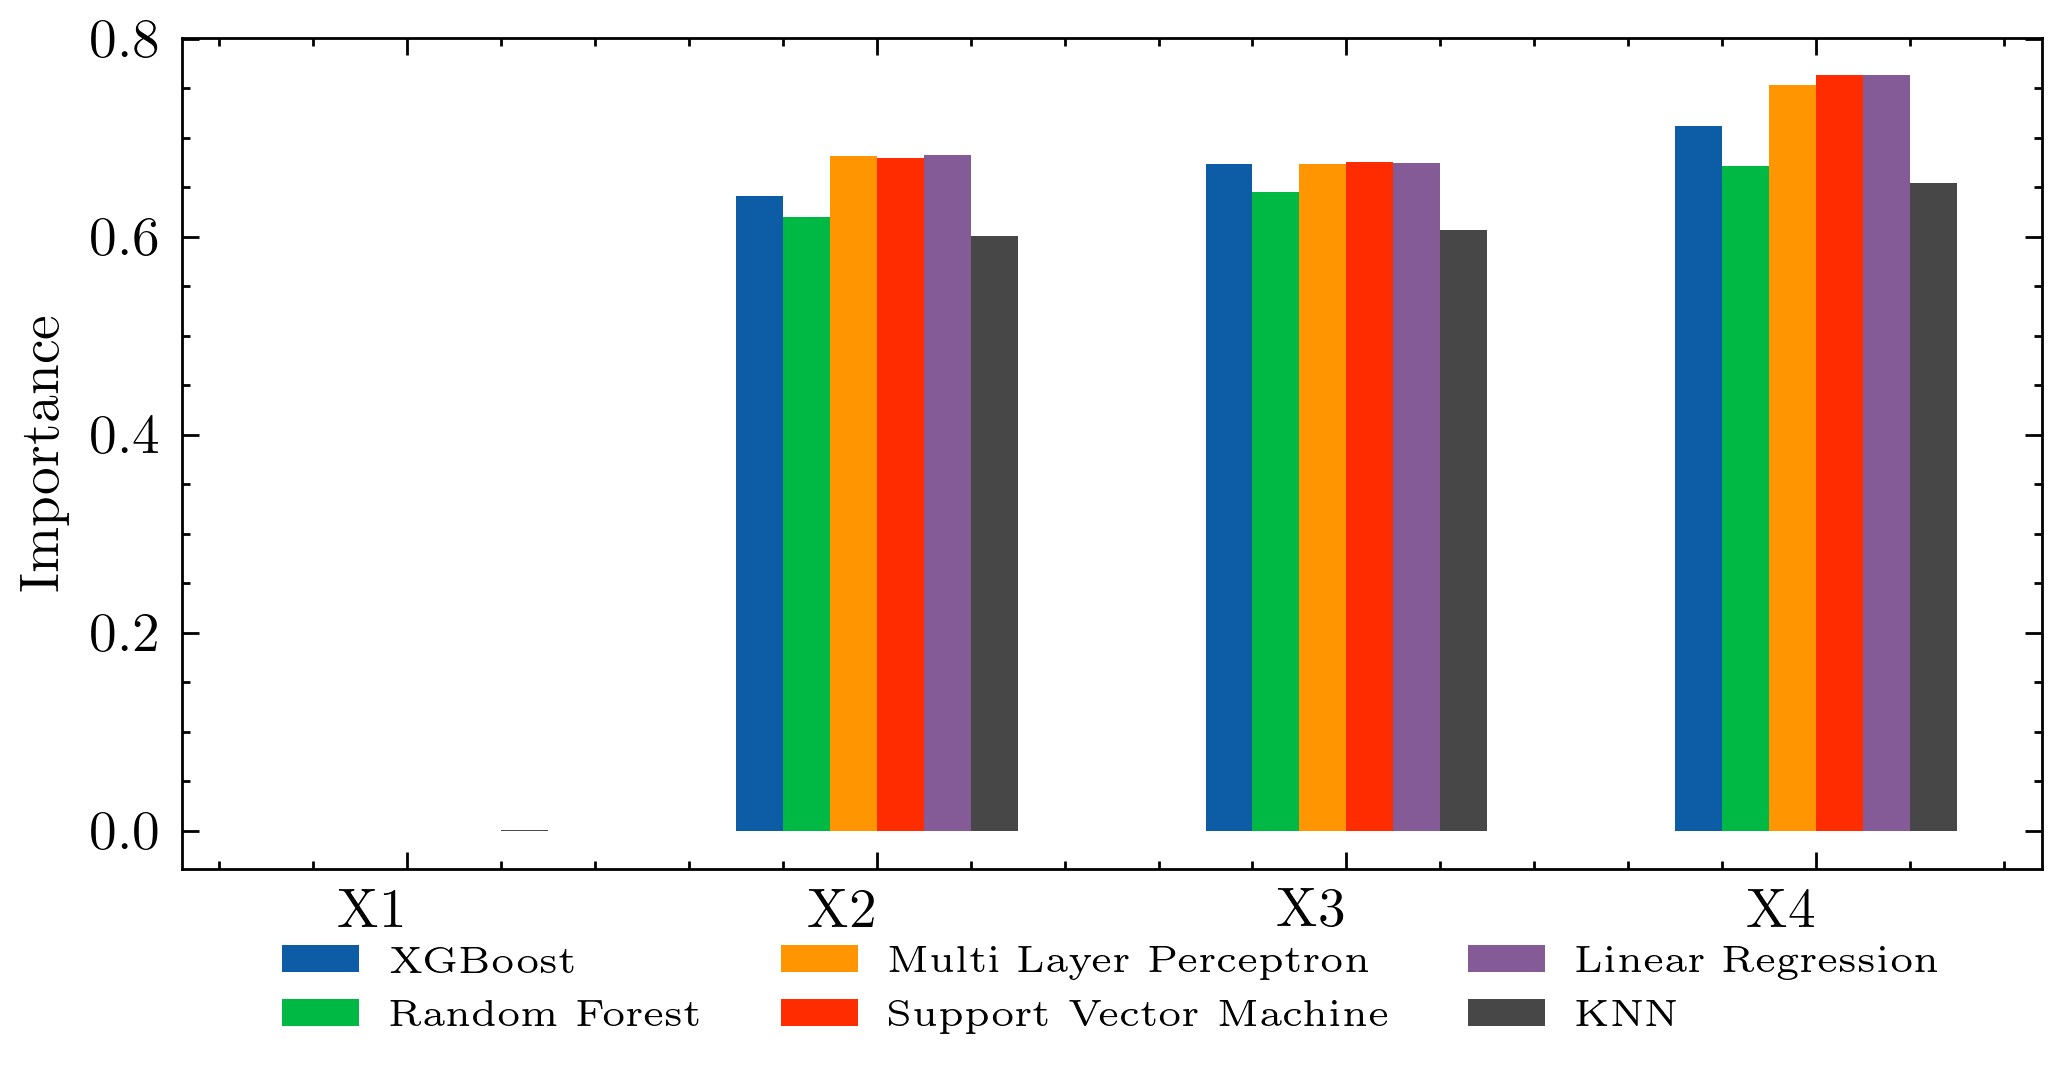

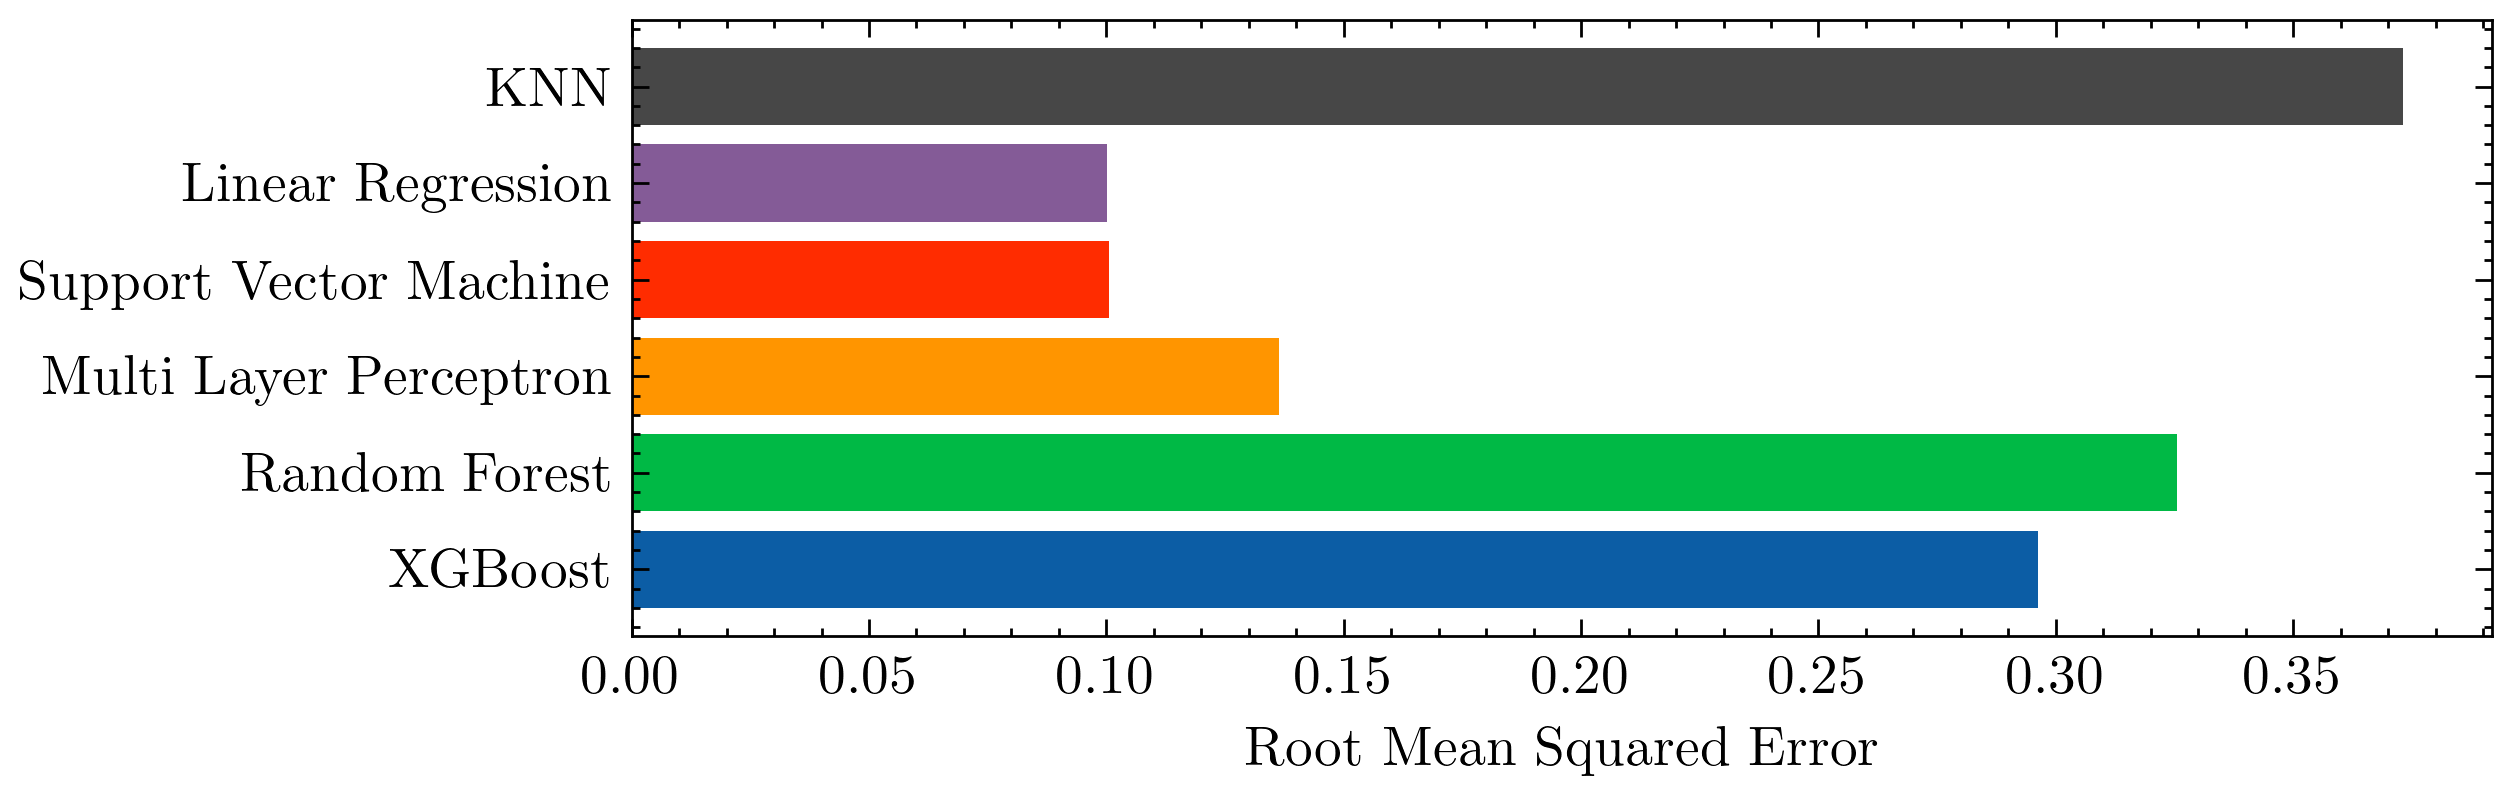

In [85]:
np.random.seed(123)

num_samples = 1500

# Generating each feature separately
X1 = np.random.randn(num_samples)  # Feature 1
X2 = np.random.randn(num_samples)  # Feature 2
X3 = np.random.randn(num_samples)  # Feature 3
X4 = np.random.randn(num_samples)  # Feature 4

# Target variable (y) as the sum of features plus noise
noise = np.random.normal(0, 0.1, num_samples)  # Adding noise
y = 0*X1  + X2 +  X3 + X4 + noise

# Creating a DataFrame
data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4,'y': y})

# Features and Target
X = data[['X1', 'X2', 'X3', 'X4']]
y = data['y']

# Splitting the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting different regression models
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Support Vector Machine Regression
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train)

# XGBoost Regression
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
# Multi-layer Perceptron Regression
mlp_reg = MLPRegressor(hidden_layer_sizes=(100), max_iter=1000, random_state=42)
mlp_reg.fit(X_train, y_train)

# Example usage with custom colors
models = {
    'XGBoost': xgb_reg,
    'Random Forest': rf_reg,
    'Multi Layer Perceptron': mlp_reg,
    'Support Vector Machine': svm_reg,
    "Linear Regression":linear_reg,
    "KNN":knn_reg,
}

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
num_colors = 10
custom_colors = color_cycle[:num_colors]

plot_feature_importance_comparison(models, X_test, y_test, colors=custom_colors)
plot_feature_mean_squared_error(models,X_train,y_train,custom_colors)

In [86]:
%%capture
from sklearn.inspection import PartialDependenceDisplay
my_plot = None
with plt.style.context('science'):
    fig,(ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(10, 2.5))  # (rows, columns, index)
    lr_disp = PartialDependenceDisplay.from_estimator(linear_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    knn_disp = PartialDependenceDisplay.from_estimator(knn_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    xgb_disp = PartialDependenceDisplay.from_estimator(xgb_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    rf_disp = PartialDependenceDisplay.from_estimator(rf_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    mlrp_disp = PartialDependenceDisplay.from_estimator(mlp_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    svm_disp = PartialDependenceDisplay.from_estimator(svm_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    x_vals = np.linspace(-2, 2, 1000)
    ax1.plot(x_vals, 0 *x_vals, label='true effect', color='black',linestyle='dashed')
    ax2.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    ax3.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    ax4.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    lr_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "LR","color":custom_colors[4]})
    knn_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "KNN","color":custom_colors[5]})
    xgb_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "xgboost","color":custom_colors[0]})
    rf_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "random forest","color":custom_colors[1]})
    mlrp_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "NN","color":custom_colors[2]})
    svm_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "SVM","color":custom_colors[3]})
    for ax in [ax1, ax2, ax3, ax4]:
        ax.get_legend().remove()
        ax.set_ylabel('')  
    for ax in [ax2, ax3, ax4]:
        ax.set_yticks([])
    def legend_without_duplicate_labels(ax):
        handles, labels = ax.get_legend_handles_labels()
        unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
        return unique
    lines_labels = legend_without_duplicate_labels(ax1)
    lines, labels = zip(*lines_labels)
    lines = list(lines)
    labels = list(labels)
    my_plot = fig

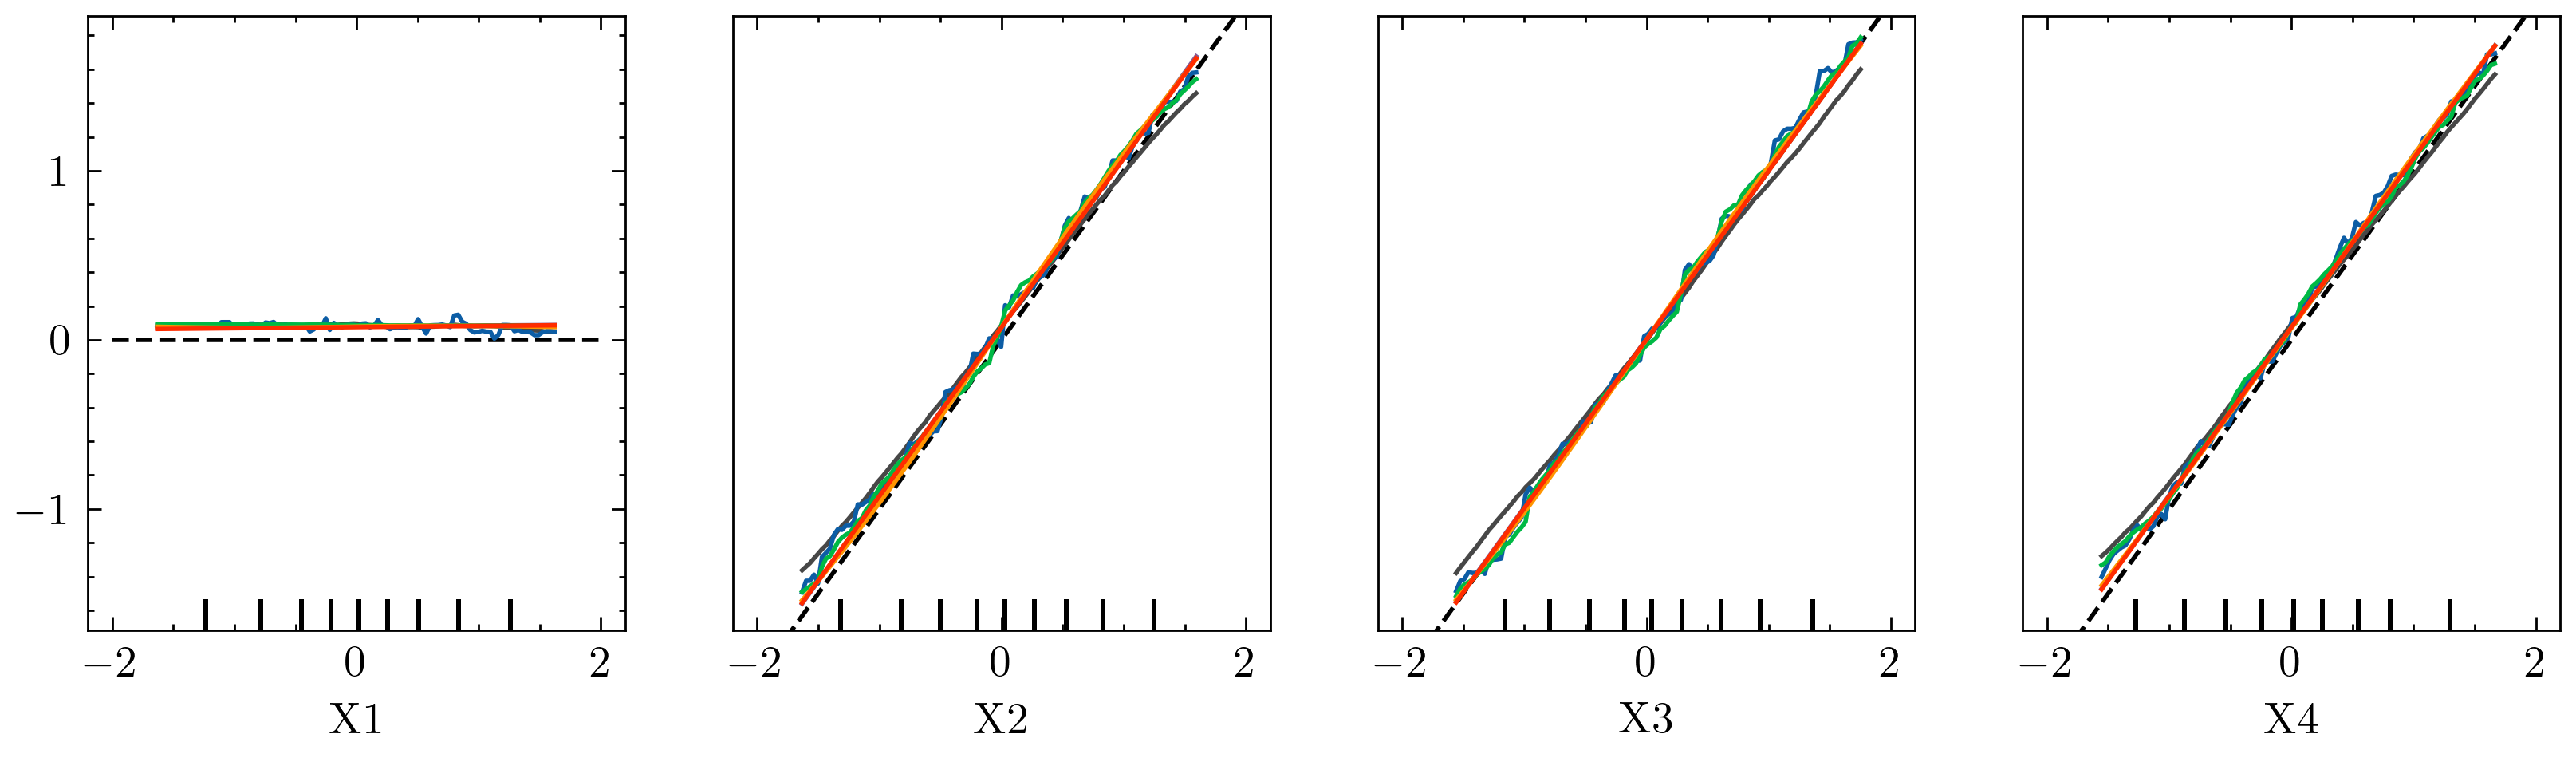

In [87]:
display(my_plot)

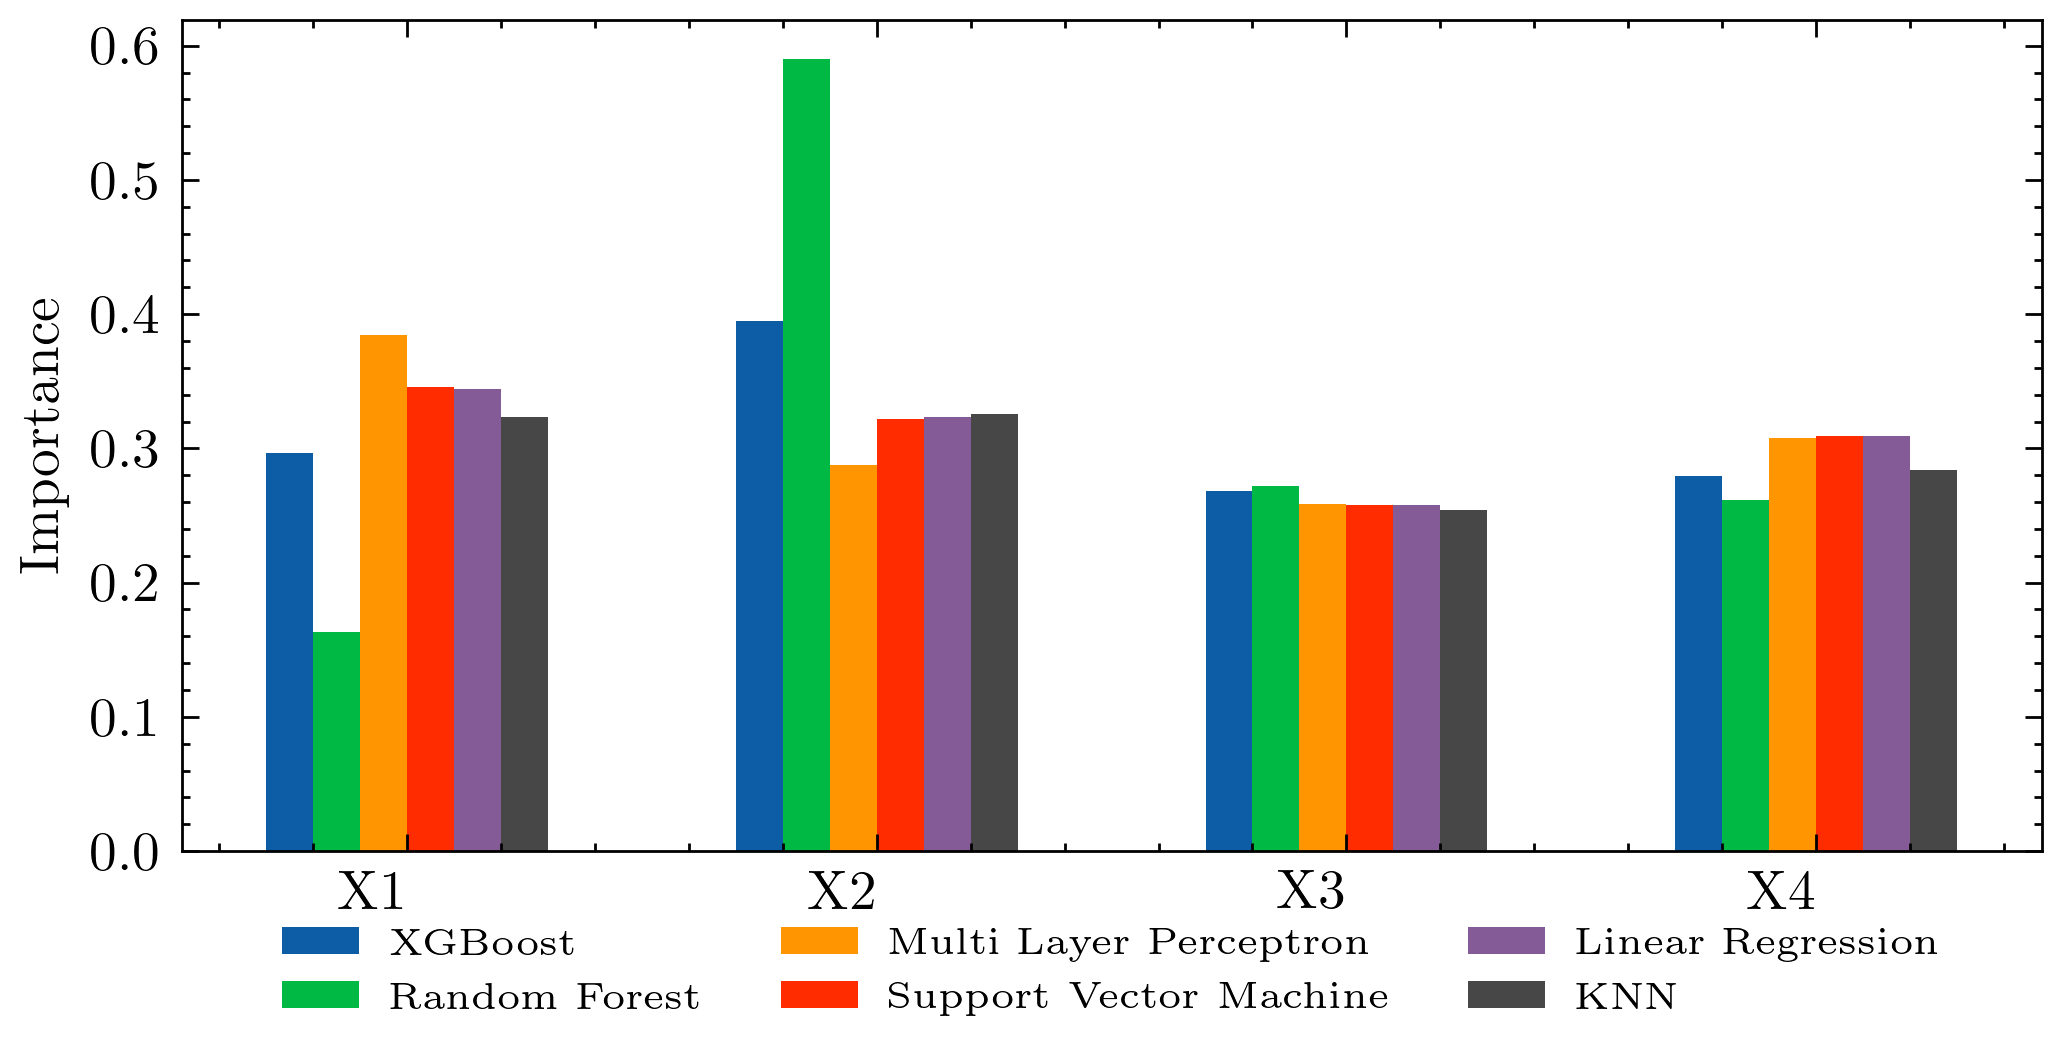

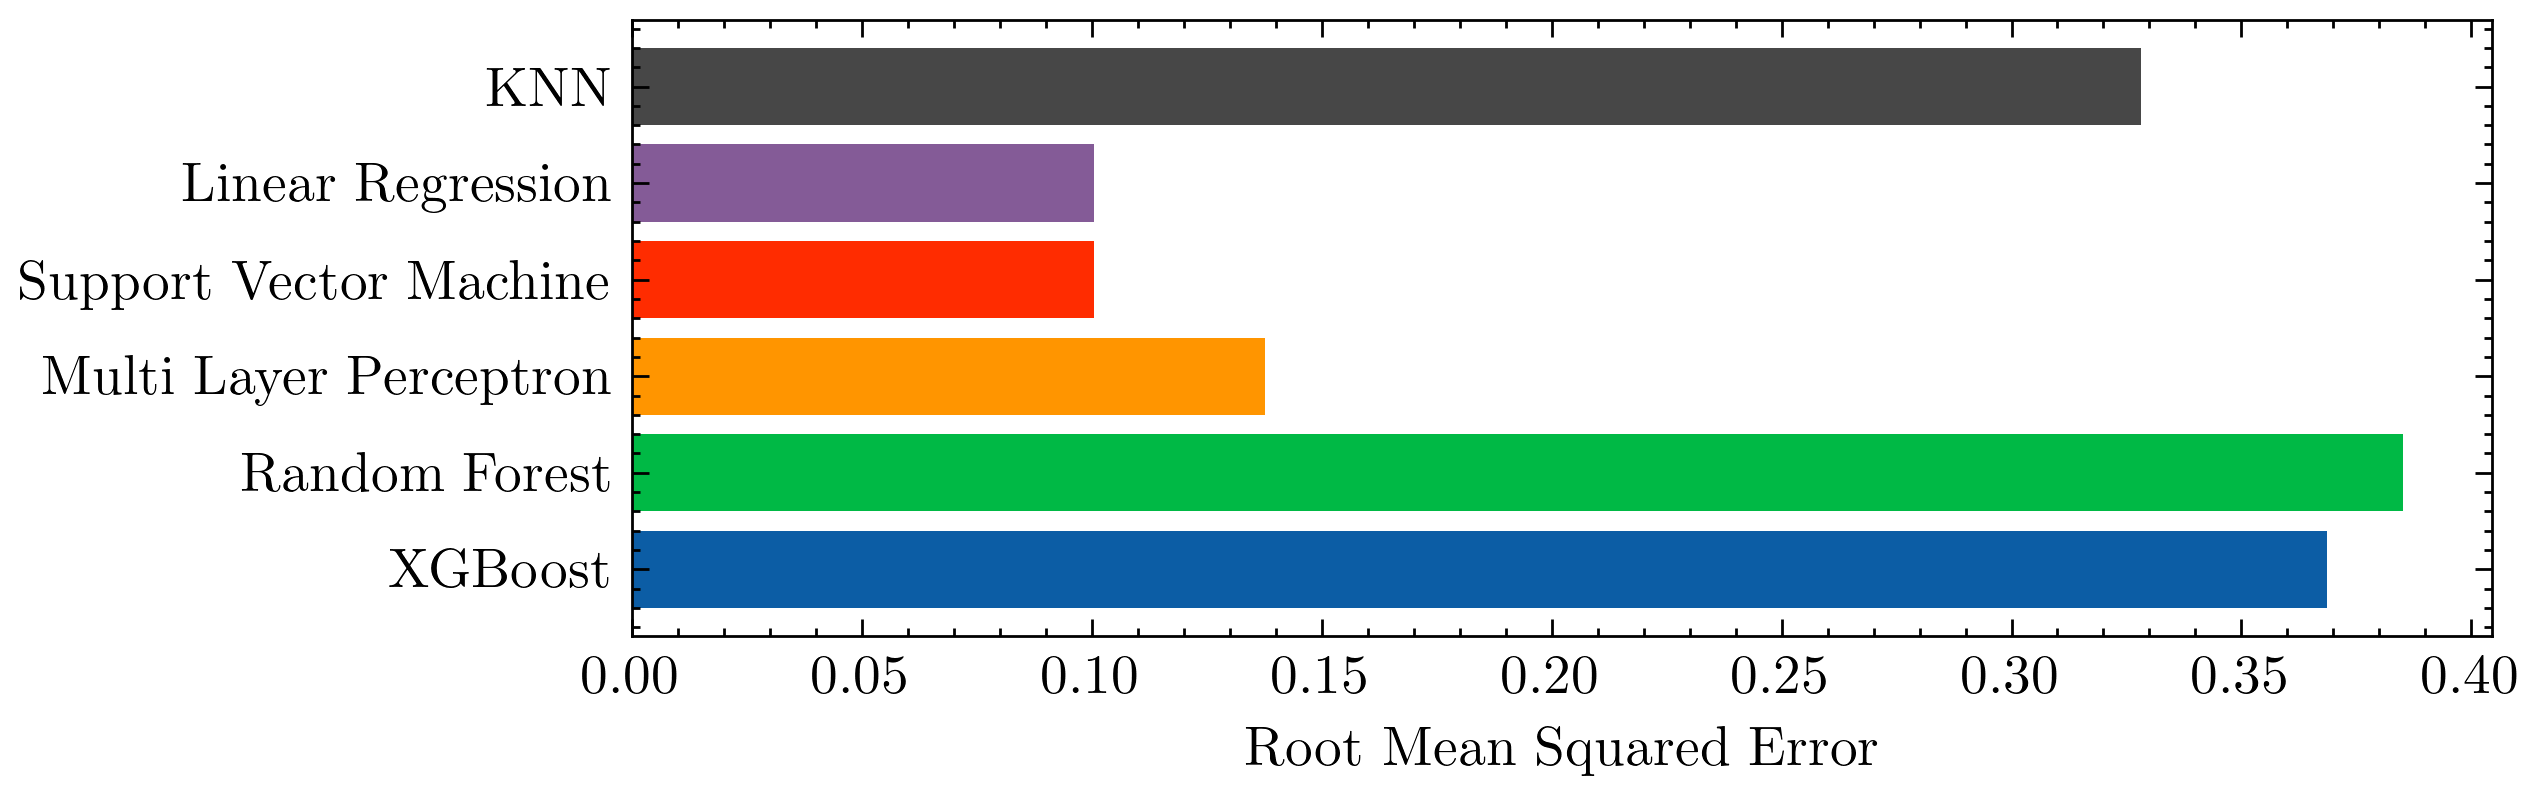

In [91]:
np.random.seed(123)

num_samples = 1500

mean = [0, 0, 0, 0]
cov = [[1, 0.95, 0, 0],
       [0.95, 1, 0, 0],
       [0, 0, 1, 0.5], 
       [0, 0, 0.5, 1]]
XS = np.random.multivariate_normal(mean, cov, num_samples)
X1 = XS[:, 0]
X2 = XS[:, 1]
X3 = XS[:, 2]
X4 = XS[:, 3]

noise = np.random.normal(0, 0.1, num_samples)  
y = X1 + X2 + X3 + X4 + noise

# Creating a DataFrame
data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4,'y': y})

# Features and Target
X = data[['X1', 'X2', 'X3', 'X4']]
y = data['y']

# Splitting the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting different regression models
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Support Vector Machine Regression
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train)

# XGBoost Regression
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
# Multi-layer Perceptron Regression
mlp_reg = MLPRegressor(hidden_layer_sizes=(100), max_iter=1000, random_state=42)
mlp_reg.fit(X_train, y_train)

# Example usage with custom colors
models = {
    'XGBoost': xgb_reg,
    'Random Forest': rf_reg,
    'Multi Layer Perceptron': mlp_reg,
    'Support Vector Machine': svm_reg,
    "Linear Regression":linear_reg,
    "KNN":knn_reg,
}

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
num_colors = 10
custom_colors = color_cycle[:num_colors]

plot_feature_importance_comparison(models, X_test, y_test, colors=custom_colors)
plot_feature_mean_squared_error(models,X_train,y_train,custom_colors)

In [94]:
%%capture
from sklearn.inspection import PartialDependenceDisplay
my_plot = None
with plt.style.context('science'):
    fig,(ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(10, 2.5))  # (rows, columns, index)
    lr_disp = PartialDependenceDisplay.from_estimator(linear_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    knn_disp = PartialDependenceDisplay.from_estimator(knn_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    xgb_disp = PartialDependenceDisplay.from_estimator(xgb_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    rf_disp = PartialDependenceDisplay.from_estimator(rf_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    mlrp_disp = PartialDependenceDisplay.from_estimator(mlp_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    svm_disp = PartialDependenceDisplay.from_estimator(svm_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    x_vals = np.linspace(-2, 2, 1000)
    ax1.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    ax2.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    ax3.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    ax4.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    lr_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "LR","color":custom_colors[4]})
    knn_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "KNN","color":custom_colors[5]})
    xgb_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "xgboost","color":custom_colors[0]})
    rf_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "random forest","color":custom_colors[1]})
    mlrp_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "NN","color":custom_colors[2]})
    svm_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "SVM","color":custom_colors[3]})
    for ax in [ax1, ax2, ax3, ax4]:
        ax.get_legend().remove()
        ax.set_ylim(-3, 3)
        ax.set_ylabel('')  
    for ax in [ax2, ax3, ax4]:
        ax.set_yticks([])
    def legend_without_duplicate_labels(ax):
        handles, labels = ax.get_legend_handles_labels()
        unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
        return unique
    lines_labels = legend_without_duplicate_labels(ax1)
    lines, labels = zip(*lines_labels)
    lines = list(lines)
    labels = list(labels)
    my_plot = fig

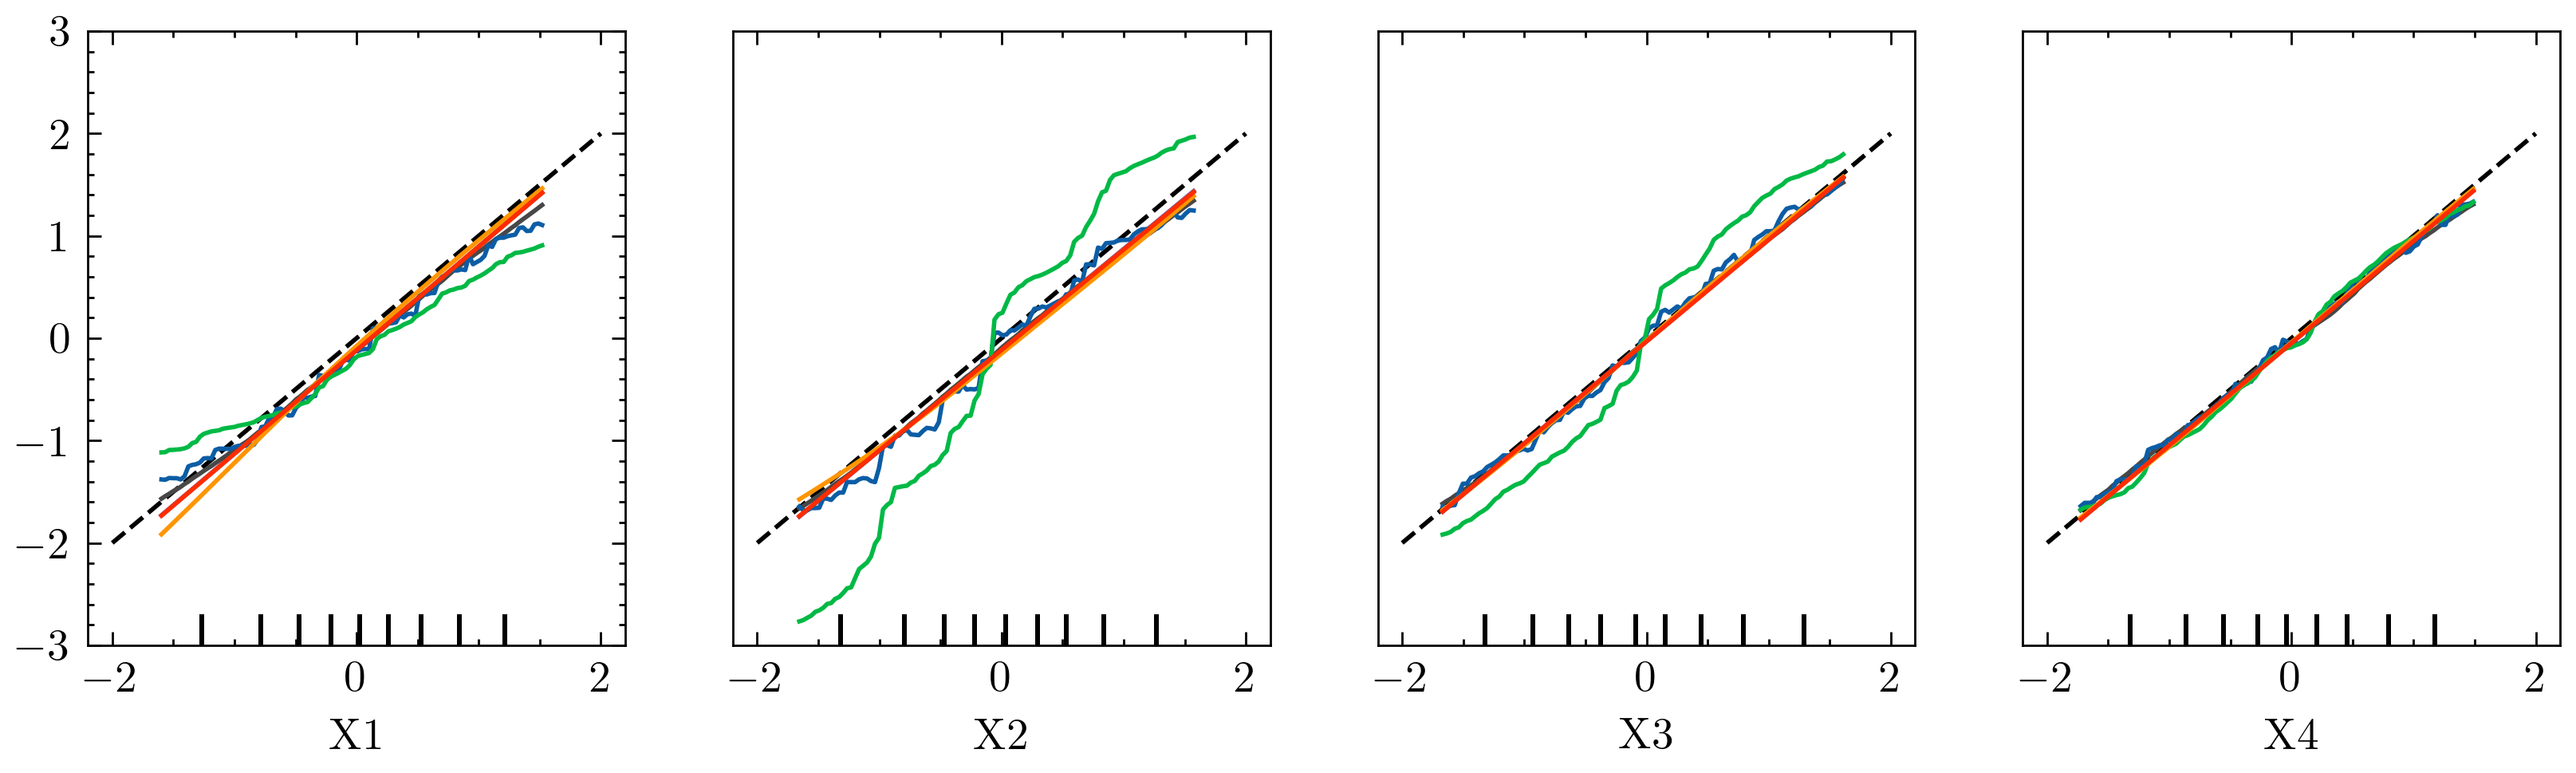

In [95]:
display(my_plot)

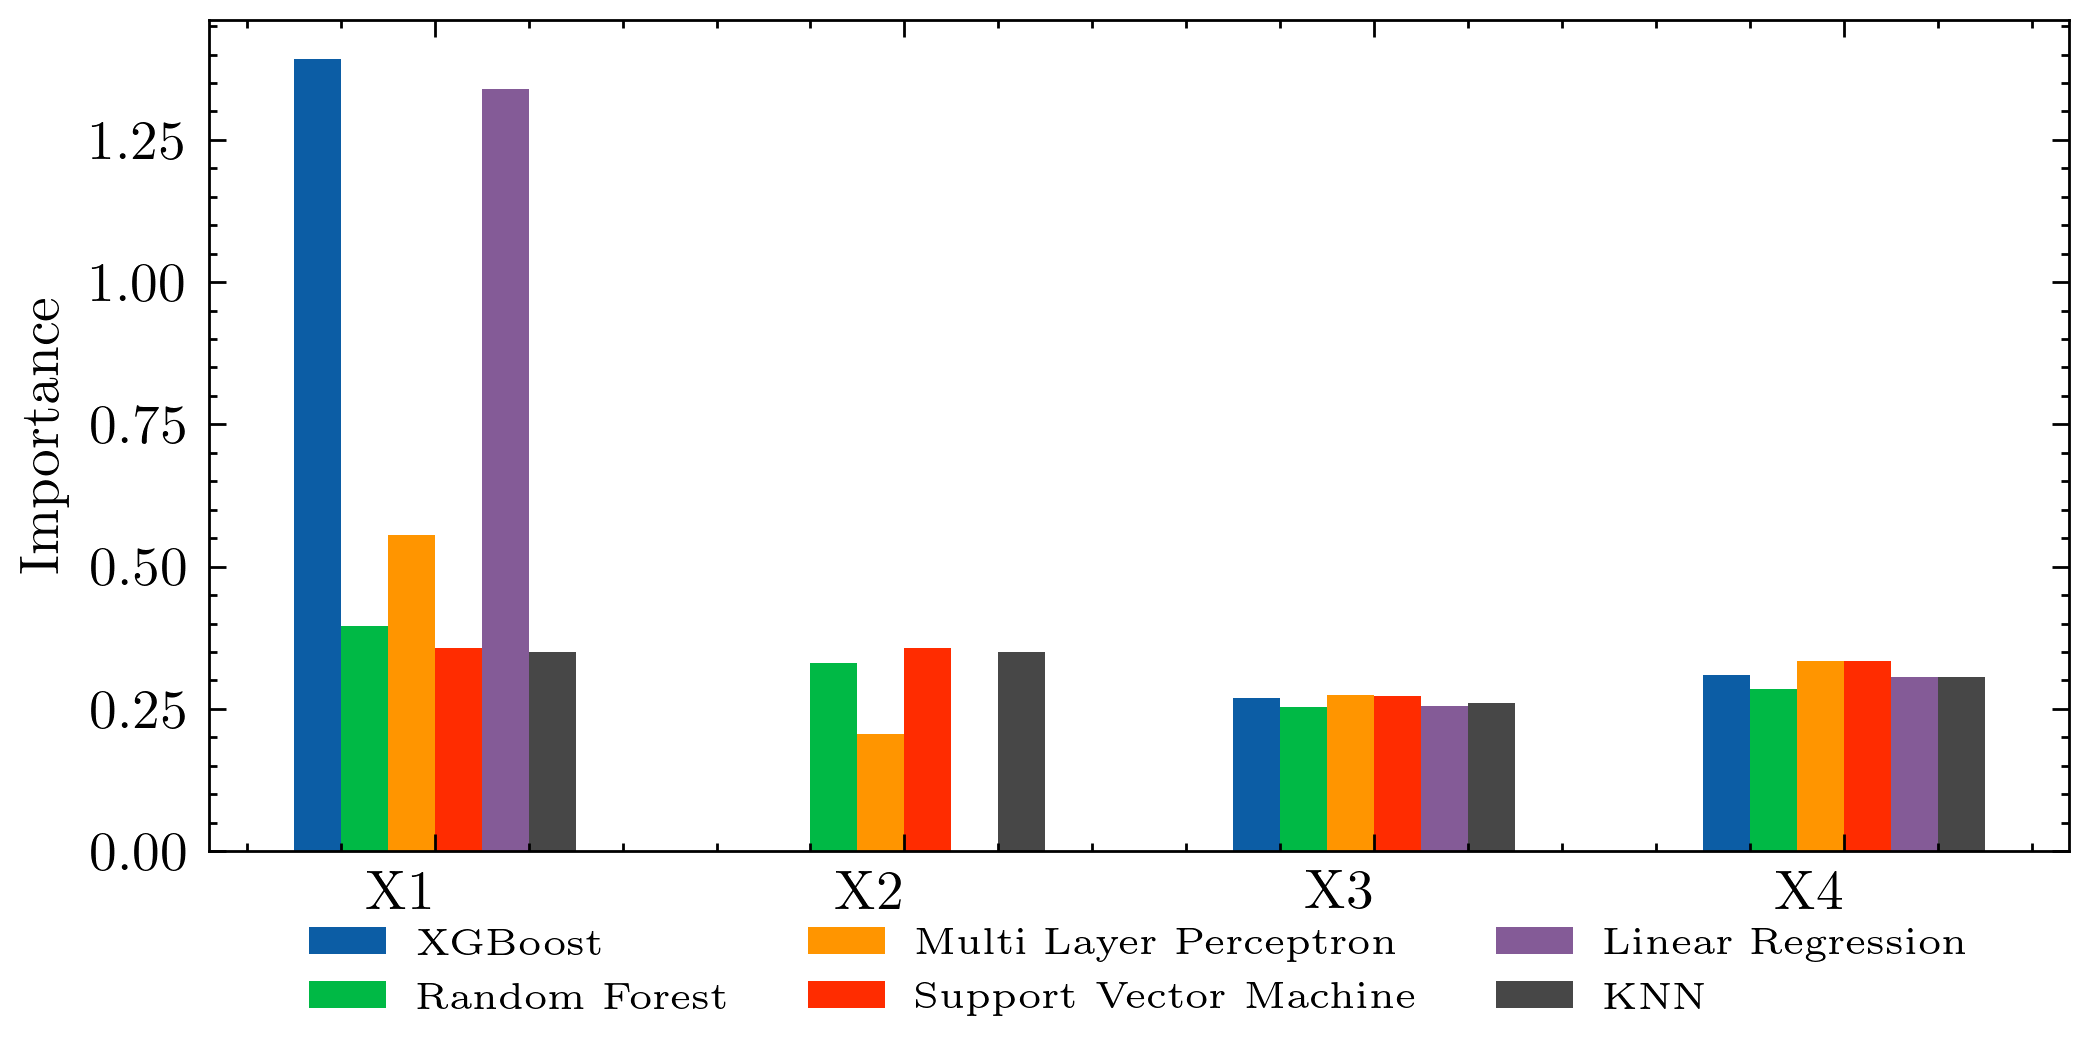

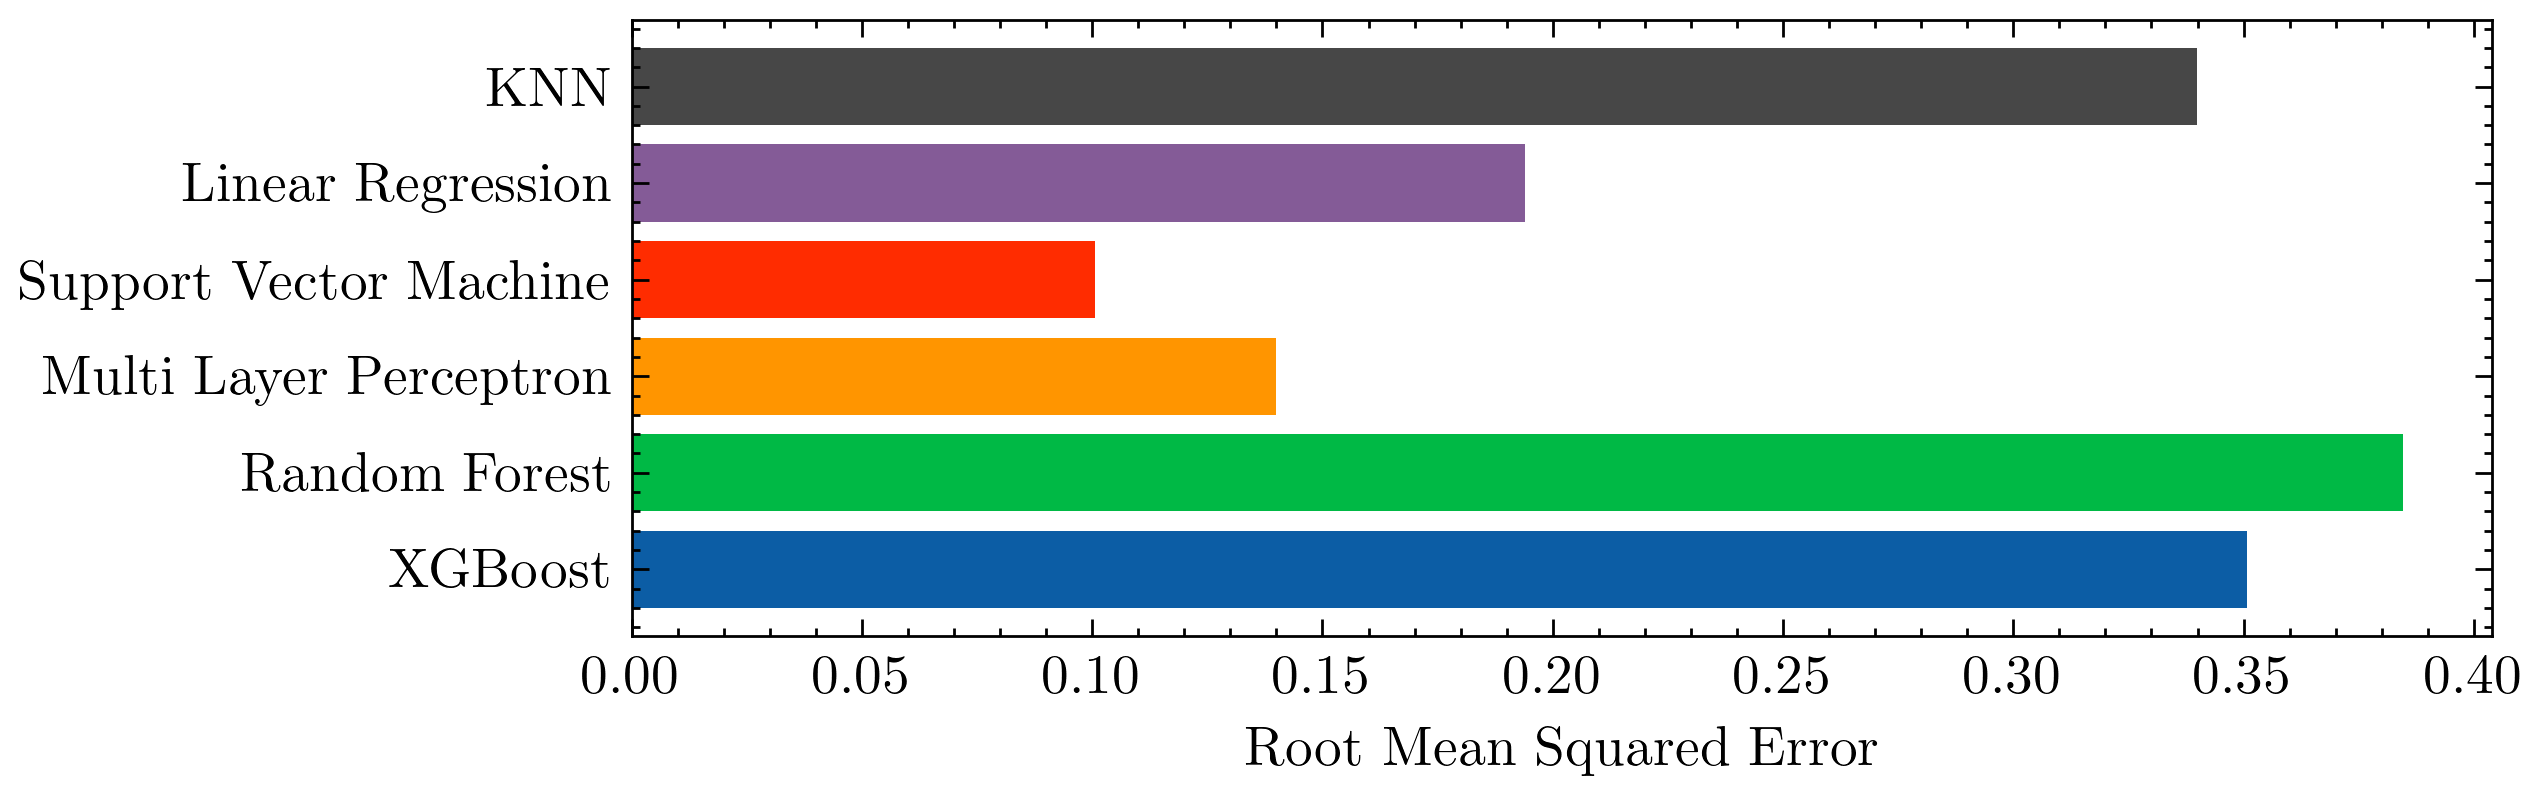

In [53]:
np.random.seed(123)

num_samples = 1500

mean = [0, 0, 0, 0]
cov = [[1, 1, 0, 0],
       [1, 1, 0, 0],
       [0, 0, 1, 0.2], 
       [0, 0, 0.2, 1]]
XS = np.random.multivariate_normal(mean, cov, num_samples)
X1 = XS[:, 0]
X2 = XS[:, 1]
X3 = XS[:, 2]
X4 = XS[:, 3]

noise = np.random.normal(0, 0.1, num_samples)  
y = X1 + X2 + X3 + X4 + noise

# Creating a DataFrame
data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4,'y': y})

# Features and Target
X = data[['X1', 'X2', 'X3', 'X4']]
y = data['y']

# Splitting the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting different regression models
# Linear Regression
linear_reg = Lasso(alpha=0.1)
linear_reg.fit(X_train, y_train)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Support Vector Machine Regression
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train)

# XGBoost Regression
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
# Multi-layer Perceptron Regression
mlp_reg = MLPRegressor(hidden_layer_sizes=(100), max_iter=1000, random_state=42)
mlp_reg.fit(X_train, y_train)

# Example usage with custom colors
models = {
    'XGBoost': xgb_reg,
    'Random Forest': rf_reg,
    'Multi Layer Perceptron': mlp_reg,
    'Support Vector Machine': svm_reg,
    "Linear Regression":linear_reg,
    "KNN":knn_reg,
}

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
num_colors = 10
custom_colors = color_cycle[:num_colors]

plot_feature_importance_comparison(models, X_test, y_test, colors=custom_colors)
plot_feature_mean_squared_error(models,X_train,y_train,custom_colors)

In [54]:
%%capture
from sklearn.inspection import PartialDependenceDisplay
my_plot = None
with plt.style.context('science'):
    fig,(ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(10, 1))  # (rows, columns, index)
    lr_disp = PartialDependenceDisplay.from_estimator(linear_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    knn_disp = PartialDependenceDisplay.from_estimator(knn_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    xgb_disp = PartialDependenceDisplay.from_estimator(xgb_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    rf_disp = PartialDependenceDisplay.from_estimator(rf_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    mlrp_disp = PartialDependenceDisplay.from_estimator(mlp_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    svm_disp = PartialDependenceDisplay.from_estimator(svm_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    x_vals = np.linspace(-2, 2, 1000)
    ax1.plot(x_vals, 2*x_vals, label='true effect', color='black',linestyle='dashed')
    ax2.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    ax3.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    ax4.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    lr_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "LR","color":custom_colors[4]})
    knn_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "KNN","color":custom_colors[5]})
    xgb_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "xgboost","color":custom_colors[0]})
    rf_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "random forest","color":custom_colors[1]})
    mlrp_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "NN","color":custom_colors[2]})
    svm_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "SVM","color":custom_colors[3]})
    for ax in [ax1, ax2, ax3, ax4]:
        ax.get_legend().remove()
        ax.set_ylim(-3, 3)
        ax.set_ylabel('')  
    for ax in [ax2, ax3, ax4]:
        ax.set_yticks([])
    def legend_without_duplicate_labels(ax):
        handles, labels = ax.get_legend_handles_labels()
        unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
        return unique
    lines_labels = legend_without_duplicate_labels(ax1)
    lines, labels = zip(*lines_labels)
    lines = list(lines)
    labels = list(labels)
    my_plot = fig

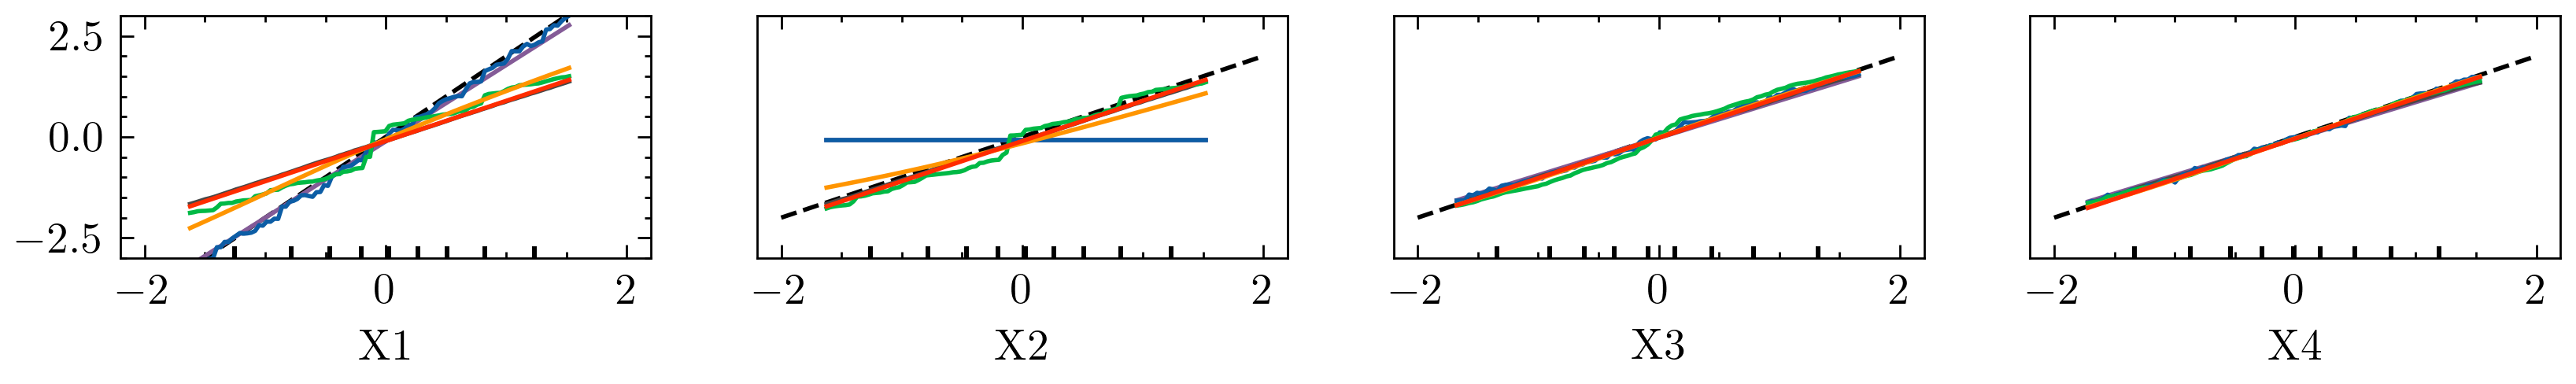

In [55]:
display(my_plot)

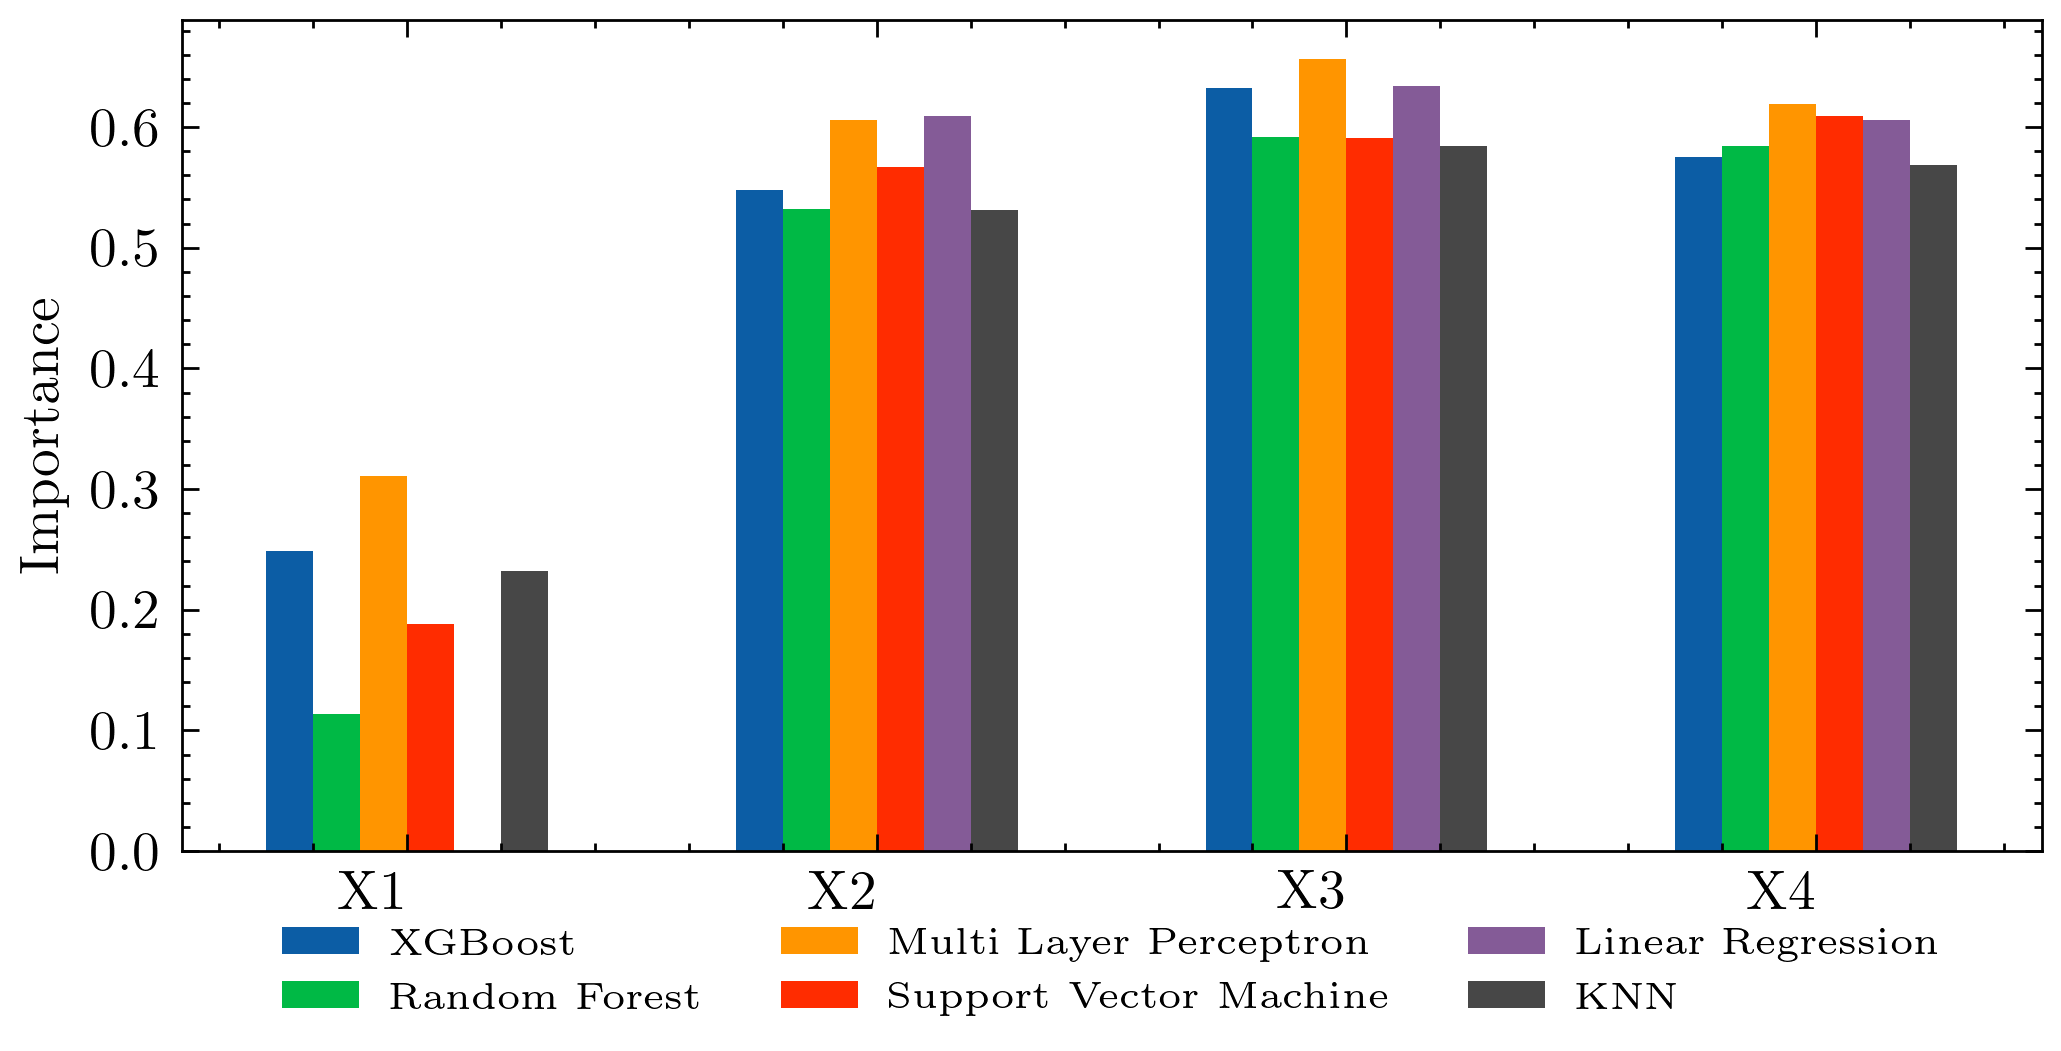

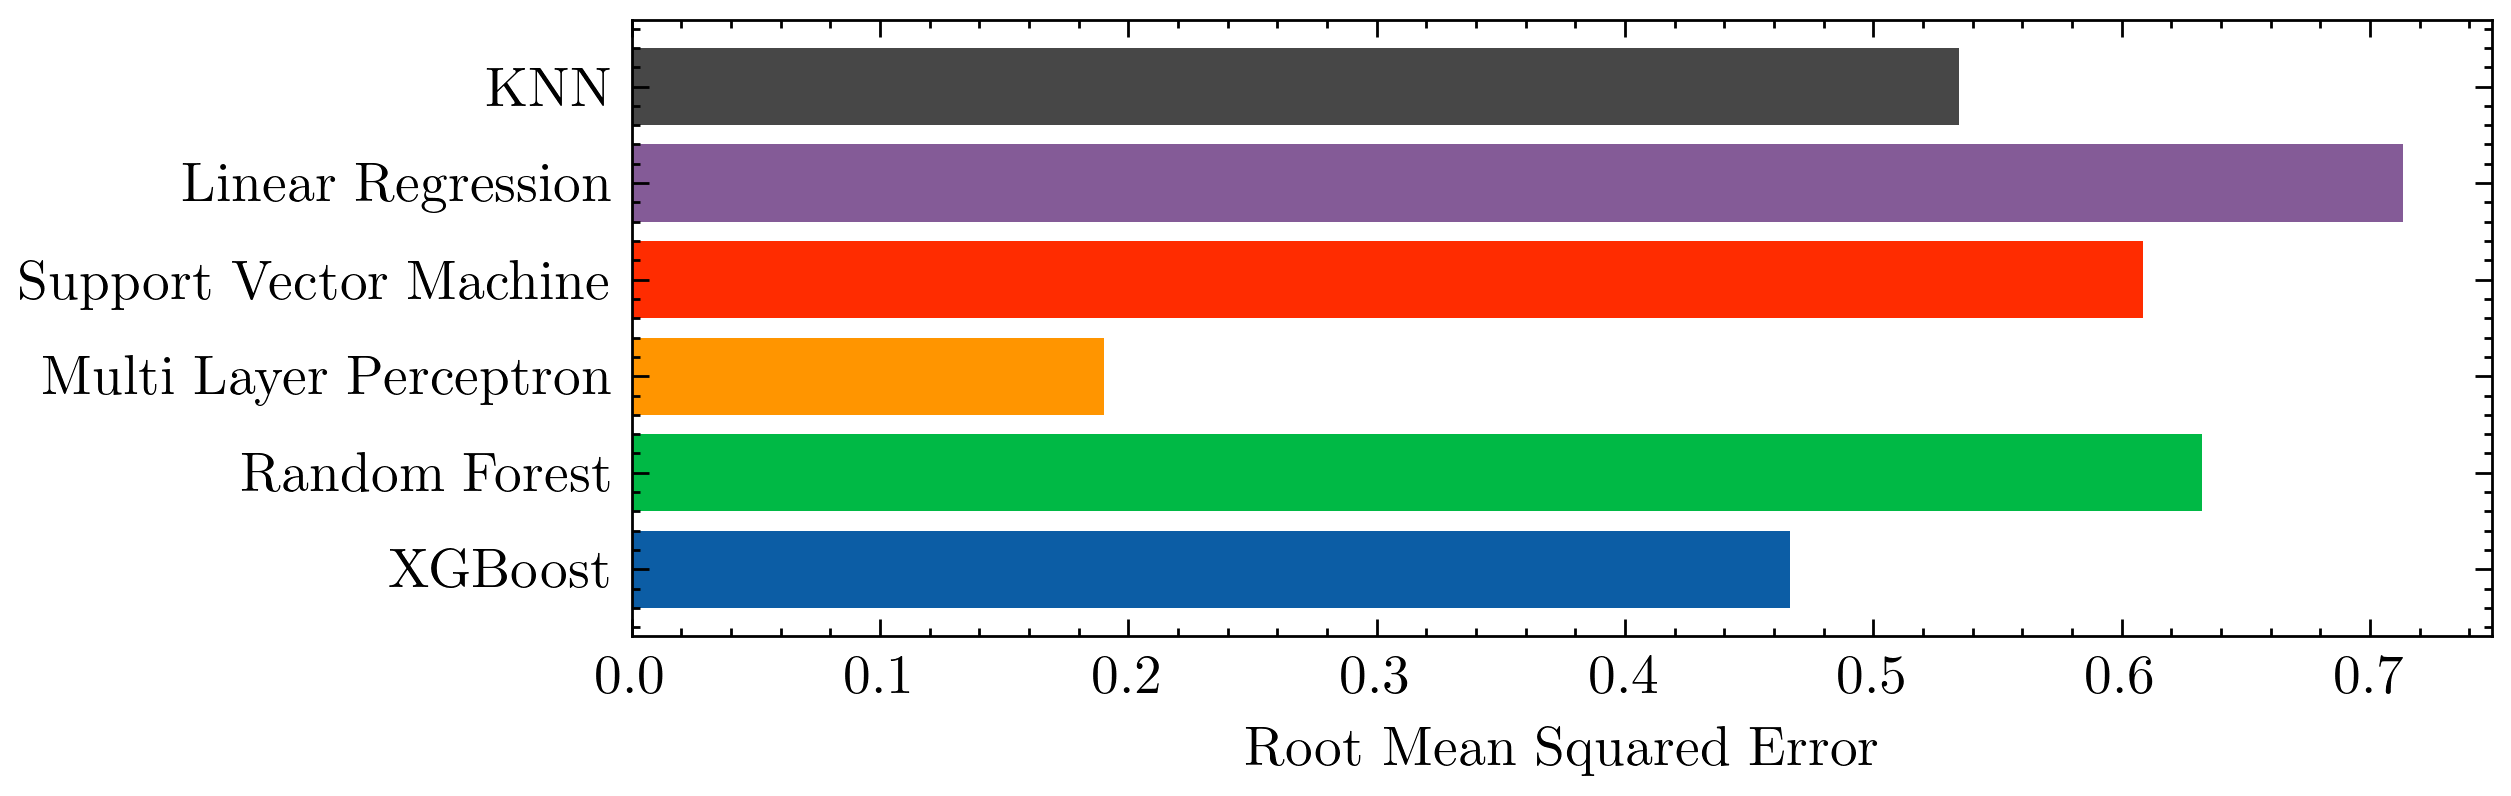

In [56]:
np.random.seed(123)

num_samples = 1500

mean = [0, 0, 0, 0]
cov = [[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0], 
       [0, 0, 0, 1]]
XS = np.random.multivariate_normal(mean, cov, num_samples)
X1 = XS[:, 0]
X2 = XS[:, 1]
X3 = XS[:, 2]
X4 = XS[:, 3]

noise = np.random.normal(0, 0.1, num_samples)  
y = np.sin(3*X1) + X2 + X3 + X4 + noise

# Creating a DataFrame
data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4,'y': y})

# Features and Target
X = data[['X1', 'X2', 'X3', 'X4']]
y = data['y']

# Splitting the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting different regression models
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Support Vector Machine Regression
svm_reg = SVR(kernel='rbf')
svm_reg.fit(X_train, y_train)

# XGBoost Regression
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
# Multi-layer Perceptron Regression
mlp_reg = MLPRegressor(hidden_layer_sizes=(100), max_iter=1000, random_state=42)
mlp_reg.fit(X_train, y_train)

# Example usage with custom colors
models = {
    'XGBoost': xgb_reg,
    'Random Forest': rf_reg,
    'Multi Layer Perceptron': mlp_reg,
    'Support Vector Machine': svm_reg,
    "Linear Regression":linear_reg,
    "KNN":knn_reg,
}

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
num_colors = 10
custom_colors = color_cycle[:num_colors]

plot_feature_importance_comparison(models, X_test, y_test, colors=custom_colors)
plot_feature_mean_squared_error(models,X_train,y_train,custom_colors)

In [57]:
%%capture
from sklearn.inspection import PartialDependenceDisplay
my_plot = None
with plt.style.context('science'):
    fig,(ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(10, 1))  # (rows, columns, index)
    lr_disp = PartialDependenceDisplay.from_estimator(linear_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    knn_disp = PartialDependenceDisplay.from_estimator(knn_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    xgb_disp = PartialDependenceDisplay.from_estimator(xgb_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    rf_disp = PartialDependenceDisplay.from_estimator(rf_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    mlrp_disp = PartialDependenceDisplay.from_estimator(mlp_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    svm_disp = PartialDependenceDisplay.from_estimator(svm_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    x_vals = np.linspace(-2, 2, 1000)
    ax1.plot(x_vals, np.sin(3*x_vals), label='true effect', color='black',linestyle='dashed')
    ax2.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    ax3.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    ax4.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    lr_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "LR","color":custom_colors[4]})
    knn_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "KNN","color":custom_colors[5]})
    xgb_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "xgboost","color":custom_colors[0]})
    rf_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "random forest","color":custom_colors[1]})
    mlrp_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "NN","color":custom_colors[2]})
    svm_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "SVM","color":custom_colors[3]})
    for ax in [ax1, ax2, ax3, ax4]:
        ax.get_legend().remove()
        ax.set_ylim(-3, 3)
        ax.set_ylabel('')  
    for ax in [ax2, ax3, ax4]:
        ax.set_yticks([])
    def legend_without_duplicate_labels(ax):
        handles, labels = ax.get_legend_handles_labels()
        unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
        return unique
    lines_labels = legend_without_duplicate_labels(ax1)
    lines, labels = zip(*lines_labels)
    lines = list(lines)
    labels = list(labels)
    my_plot = fig

The correlation coefficient between \(x_1\) and \(x_2\) is denoted by \(\rho\) and is \(0.95\).


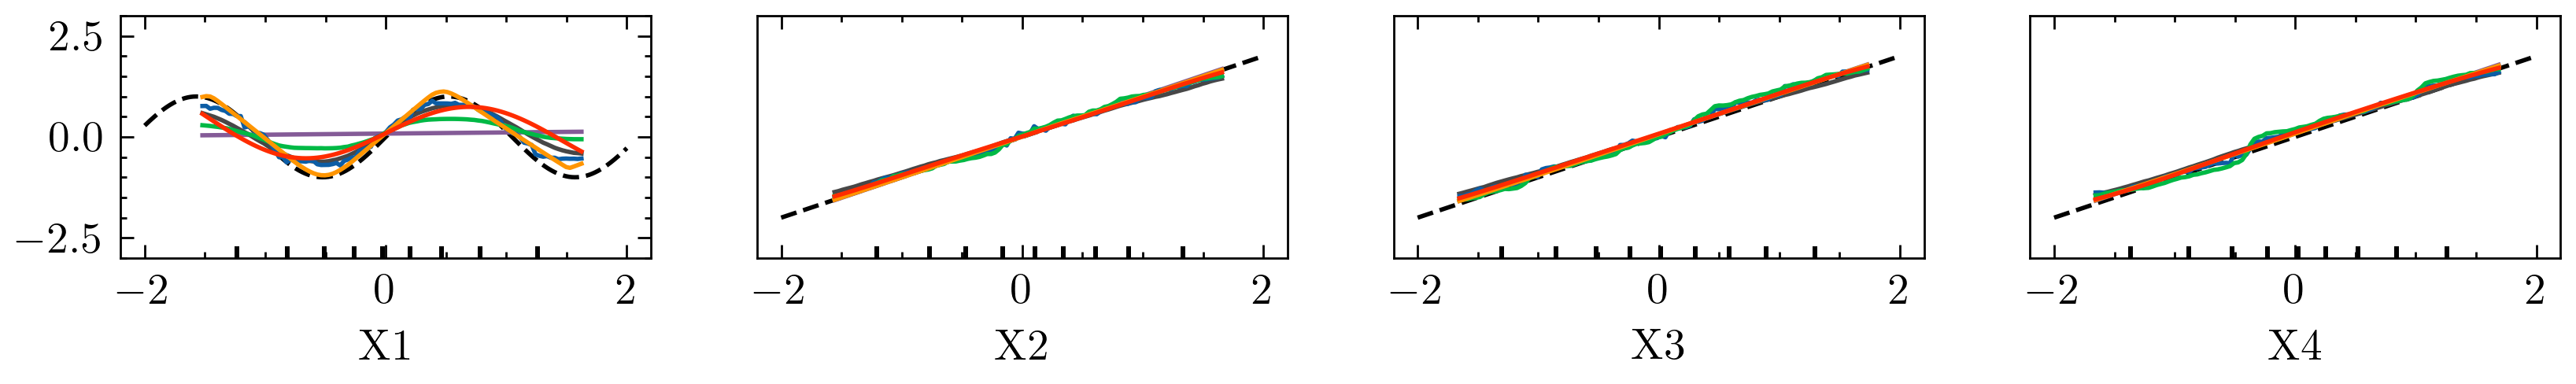

In [58]:
display(my_plot)

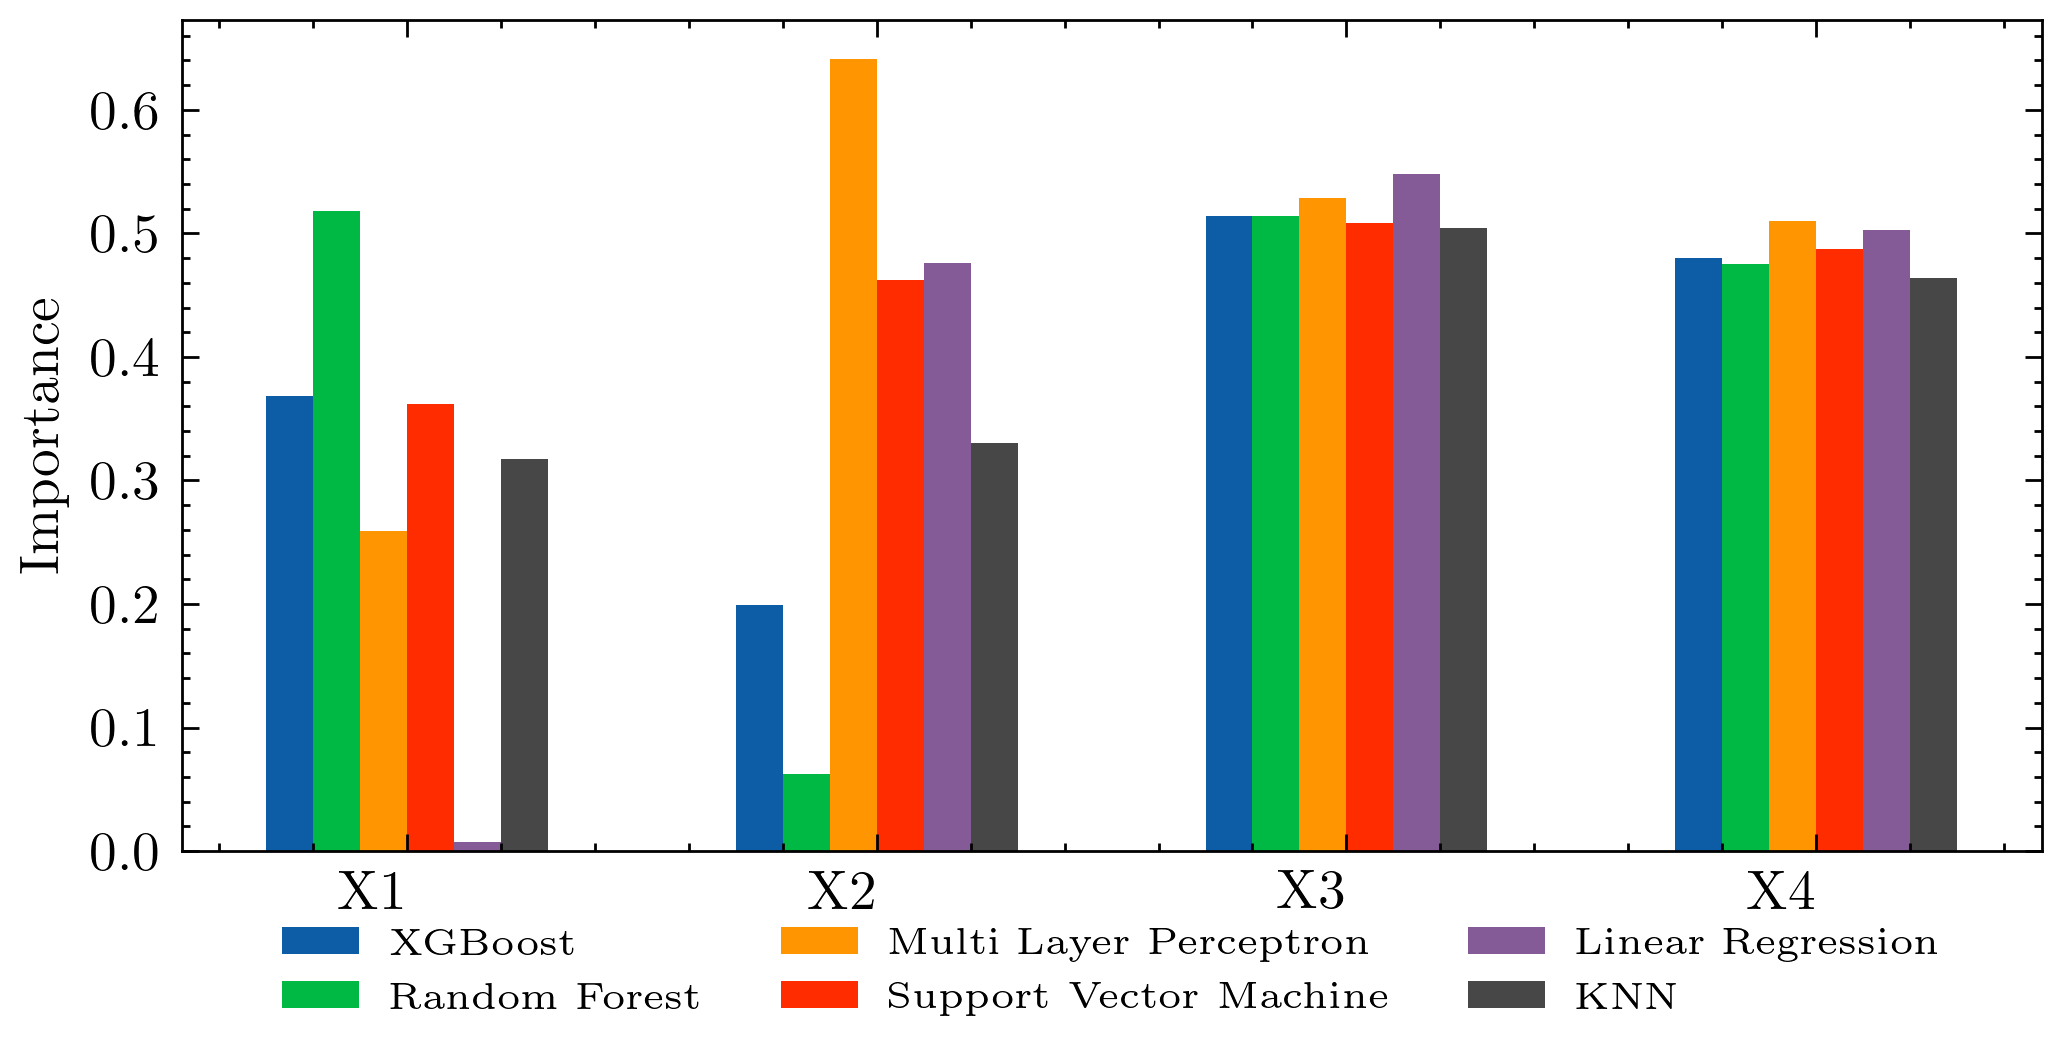

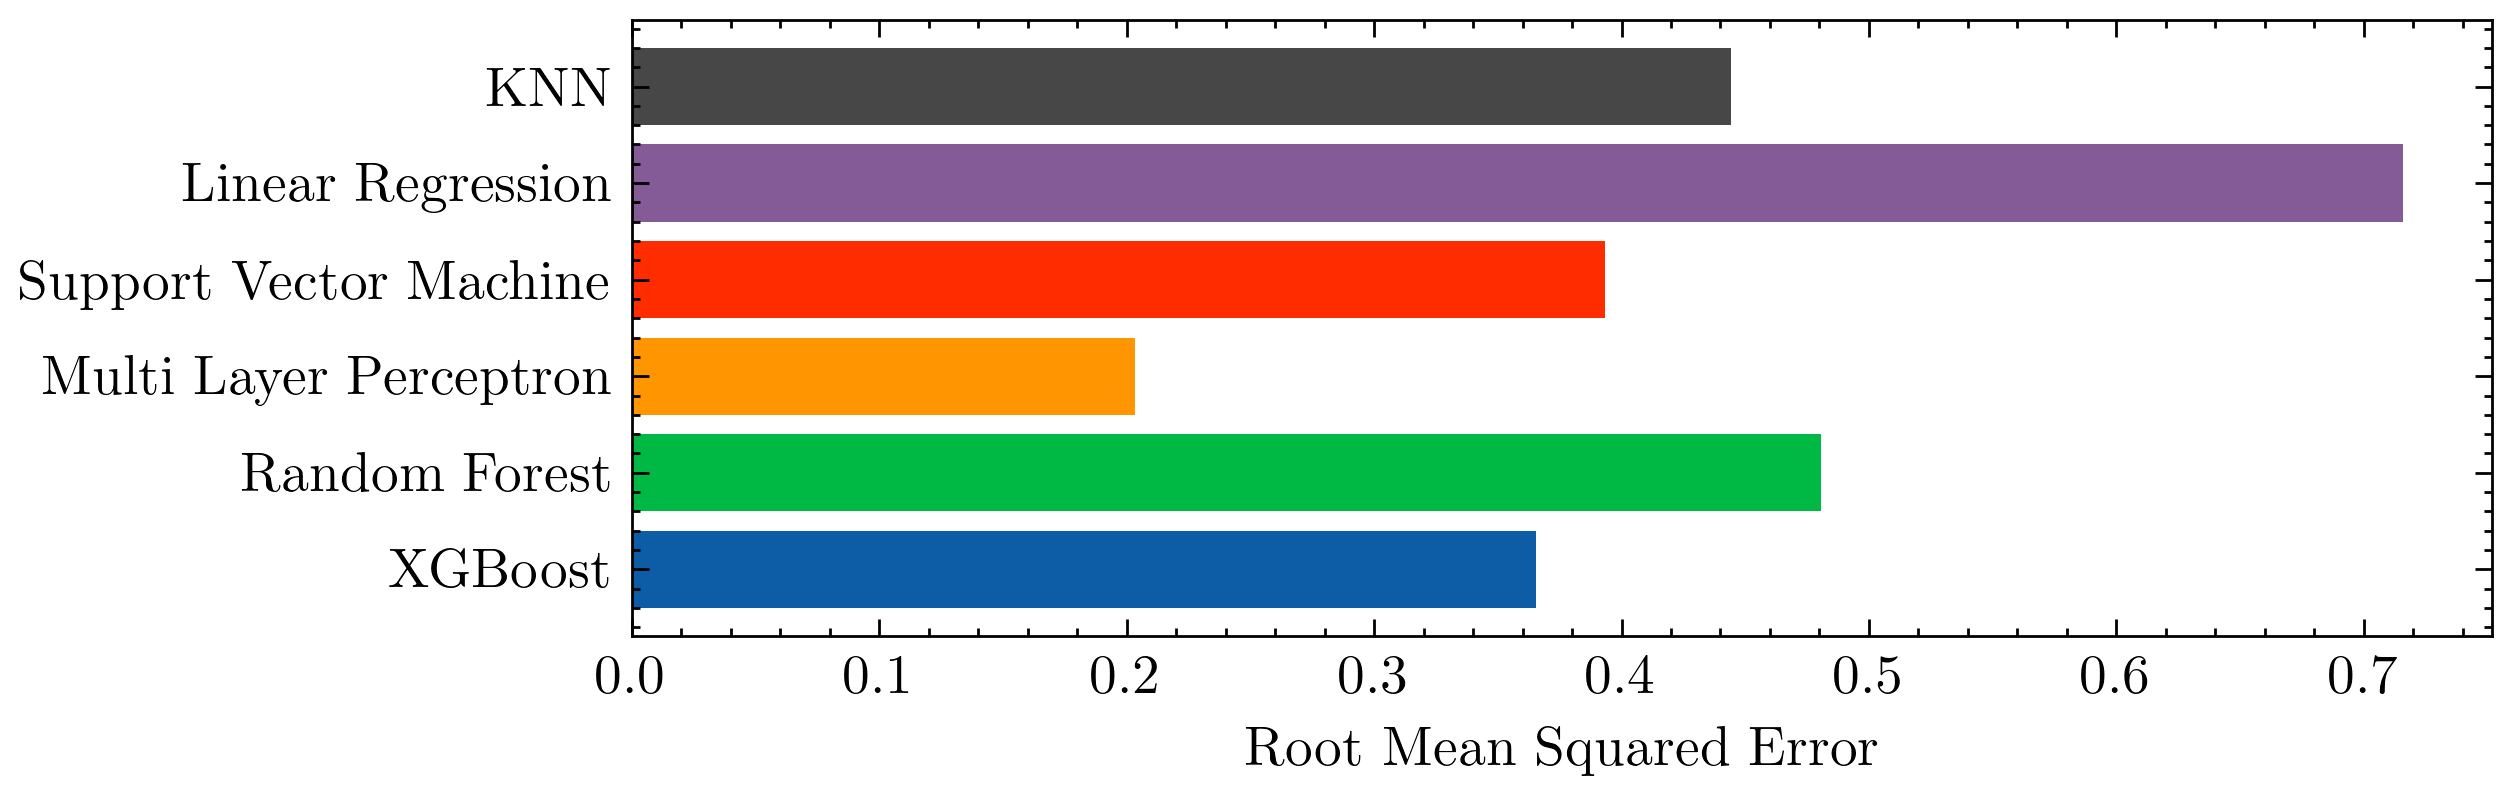

In [59]:
np.random.seed(123)

num_samples = 1500

mean = [0, 0, 0, 0]
cov = [[1, 0.95, 0, 0],
       [0.95, 1, 0, 0],
       [0, 0, 1, 0], 
       [0, 0, 0, 1]]
XS = np.random.multivariate_normal(mean, cov, num_samples)
X1 = XS[:, 0]
X2 = XS[:, 1]
X3 = XS[:, 2]
X4 = XS[:, 3]

noise = np.random.normal(0, 0.1, num_samples)  
y = np.sin(3*X1) + X2 + X3 + X4 + noise

# Creating a DataFrame
data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4,'y': y})

# Features and Target
X = data[['X1', 'X2', 'X3', 'X4']]
y = data['y']

# Splitting the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting different regression models
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Support Vector Machine Regression
svm_reg = SVR(kernel='rbf')
svm_reg.fit(X_train, y_train)

# XGBoost Regression
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
# Multi-layer Perceptron Regression
mlp_reg = MLPRegressor(hidden_layer_sizes=(100), max_iter=1000, random_state=42)
mlp_reg.fit(X_train, y_train)

# Example usage with custom colors
models = {
    'XGBoost': xgb_reg,
    'Random Forest': rf_reg,
    'Multi Layer Perceptron': mlp_reg,
    'Support Vector Machine': svm_reg,
    "Linear Regression":linear_reg,
    "KNN":knn_reg,
}

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
num_colors = 10
custom_colors = color_cycle[:num_colors]

plot_feature_importance_comparison(models, X_test, y_test, colors=custom_colors)
plot_feature_mean_squared_error(models,X_train,y_train,custom_colors)

In [60]:
%%capture
from sklearn.inspection import PartialDependenceDisplay
my_plot = None
with plt.style.context('science'):
    fig,(ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(10, 1))  # (rows, columns, index)
    lr_disp = PartialDependenceDisplay.from_estimator(linear_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    knn_disp = PartialDependenceDisplay.from_estimator(knn_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    xgb_disp = PartialDependenceDisplay.from_estimator(xgb_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    rf_disp = PartialDependenceDisplay.from_estimator(rf_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    mlrp_disp = PartialDependenceDisplay.from_estimator(mlp_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    svm_disp = PartialDependenceDisplay.from_estimator(svm_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    x_vals = np.linspace(-2, 2, 1000)
    ax1.plot(x_vals, np.sin(3*x_vals), label='true effect', color='black',linestyle='dashed')
    ax2.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    ax3.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    ax4.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    lr_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "LR","color":custom_colors[4]})
    knn_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "KNN","color":custom_colors[5]})
    xgb_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "xgboost","color":custom_colors[0]})
    rf_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "random forest","color":custom_colors[1]})
    mlrp_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "NN","color":custom_colors[2]})
    svm_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "SVM","color":custom_colors[3]})
    for ax in [ax1, ax2, ax3, ax4]:
        ax.get_legend().remove()
        ax.set_ylim(-3, 3)
        ax.set_ylabel('')  
    for ax in [ax2, ax3, ax4]:
        ax.set_yticks([])
    def legend_without_duplicate_labels(ax):
        handles, labels = ax.get_legend_handles_labels()
        unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
        return unique
    lines_labels = legend_without_duplicate_labels(ax1)
    lines, labels = zip(*lines_labels)
    lines = list(lines)
    labels = list(labels)
    my_plot = fig

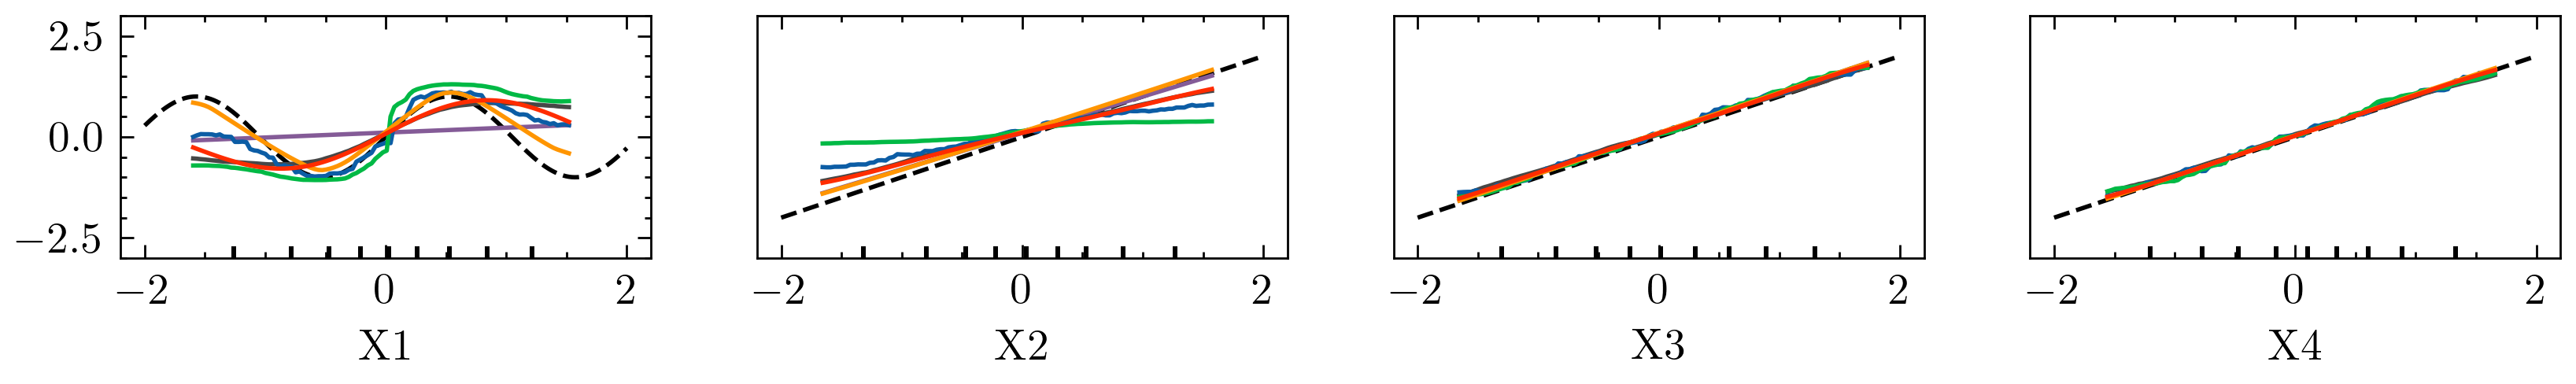

In [61]:
display(my_plot)